# Assignment 5

## SIR model

### Numerical solution using Euler method

In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, animation
import networkx as nx
import random
import os
import imageio
import glob
from PIL import Image

In [3]:
N = 10**6
R0_DICT = {0: 'epidemic', 1: 'no epidemic'}

In [4]:
def SIR_euler(beta, r, N=10**6, h=1, n=1000):
    """
    Function to generate numeric solution to SIR model using Euler method for different values of:
    
    * beta (float) - infectivity parameter
    * r (float) - recovery rate per capita
    * n (int) - population size
    * h (float) - time step for euler calculation (usually called dt)
    """
    S = np.zeros(n)
    I = np.zeros(n)
    R = np.zeros(n)
    S[0] = N
    I[0] = 1
    R[0] = 0
    for i in range(1, n):
        S[i] = S[i-1] + h*((-beta)*S[i-1]*I[i-1])
        I[i] = I[i-1] + h*(beta*S[i-1]*I[i-1] - r*I[i-1])
        R[i] = R[i-1] + h*(r*I[i-1])
    df = pd.DataFrame(list(zip(list(range(0, n)), S, I, R)),
               columns =['t', 'susceptible', 'infected', 'recovered'])
    return df

In [5]:
beta1 = 0.00005
r1 = 0.4
df1 = SIR_euler(beta1, r1, 10**6, 0.003)

Text(0.5, 1.0, 'Case for epidemic with $\\beta = 5e-05$ and $r = 0.4$')

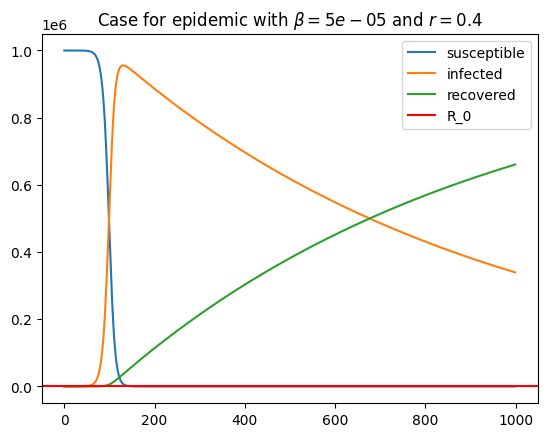

In [31]:
plt.plot(df1['t'], df1['susceptible'], label='susceptible')
plt.plot(df1['t'], df1['infected'], label='infected')
plt.plot(df1['t'], df1['recovered'], label='recovered')
plt.axhline(beta1*N/r1, color='r', label='R_0')
plt.legend()
plt.title(fr'Case for {R0_DICT[0] if beta1*N/r1>1 else R0_DICT[1]} with $\beta = {beta1}$ and $r = {r1}$')

In [27]:
beta2 = 0.0000004
r2 = 0.7
df2 = SIR_euler(beta2, r2, 10**6, 0.001)

Text(0.5, 1.0, 'Case for no epidemic with $\\beta = 4e-07$ and $r = 0.7$')

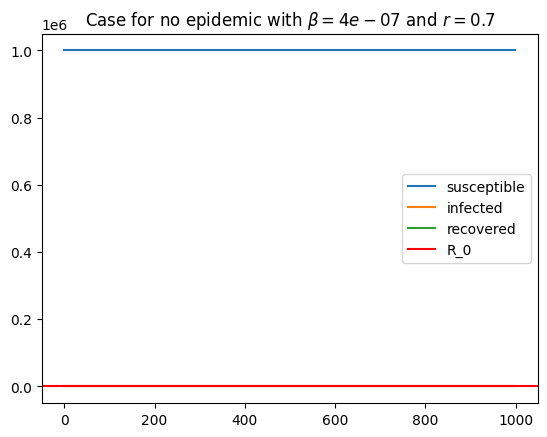

In [29]:
plt.plot(df2['t'], df2['susceptible'], label='susceptible')
plt.plot(df2['t'], df2['infected'], label='infected')
plt.plot(df2['t'], df2['recovered'], label='recovered')
plt.axhline(beta2*N/r2, color='r', label='R_0')
plt.legend()
plt.title(fr'Case for {R0_DICT[0] if beta2*N/r2>1 else R0_DICT[1]} with $\beta = {beta2}$ and $r = {r2}$')

In [24]:
beta3 = 0.00008
r3 = 0.6
df3 = SIR_euler(beta3, r3, 10**6, 0.003)

Text(0.5, 1.0, 'Case for epidemic with $\\beta = 8e-05$ and $r = 0.6$')

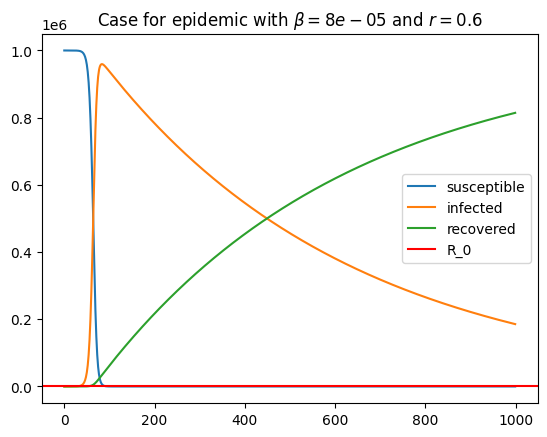

In [26]:
plt.plot(df3['t'], df3['susceptible'], label='susceptible')
plt.plot(df3['t'], df3['infected'], label='infected')
plt.plot(df3['t'], df3['recovered'], label='recovered')
plt.axhline(beta3*N/r3, color='r', label='R_0')
plt.legend()
plt.title(fr'Case for {R0_DICT[0] if beta3*N/r3>1 else R0_DICT[1]} with $\beta = {beta3}$ and $r = {r3}$')

In [32]:
beta4 = 0.0000009
r4 = 0.2
df4 = SIR_euler(beta4, r4, 10**6, 0.001)

Text(0.5, 1.0, 'Case for epidemic with $\\beta = 9e-07$ and $r = 0.6$')

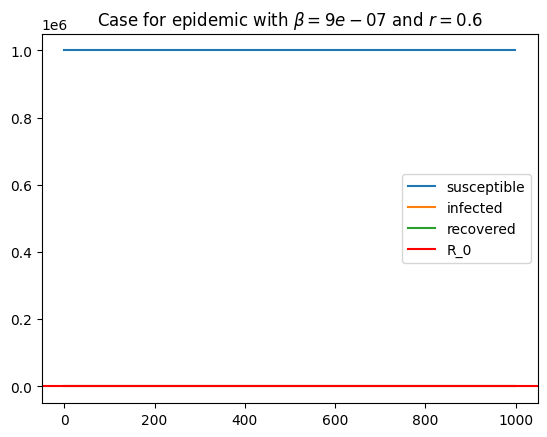

In [33]:
plt.plot(df4['t'], df4['susceptible'], label='susceptible')
plt.plot(df4['t'], df4['infected'], label='infected')
plt.plot(df4['t'], df4['recovered'], label='recovered')
plt.axhline(beta4*N/r4, color='r', label='R_0')
plt.legend()
plt.title(fr'Case for {R0_DICT[0] if beta4*N/r4>1 else R0_DICT[1]} with $\beta = {beta4}$ and $r = {r3}$')

### Phase portrait

In [34]:
def f(Y, beta, r):
    """
    Function to calculate the values needed for the phase portrait of SI model
    
    *Y (tuple) - values to calculate the function for
    * beta (float) - infectivity parameter
    * r (float) - recovery rate per capita
    """
    return np.array([-beta*Y[0]*Y[1], beta*Y[0]*Y[1] - r*Y[1]])

In [52]:
def phase_portrait(beta, r, N=100):
    """
    Function generates phase portrait for given parameters
    
    * beta (float) - infectivity parameter
    * r (float) - recovery rate per capita
    * N (int) - population size (=100)
    """
    scale = 1
    y1 = np.linspace(1, N, 20)
    y2 = np.linspace(1, N, 20)
    x, y = np.meshgrid(y1, y2)
    S = np.zeros((x.shape[0], x.shape[1]))
    I = np.zeros((x.shape[0], x.shape[1]))
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            Yprime = f([x[i, j], y[i, j]], beta, r)
            S[i, j] = Yprime[0]*scale
            I[i, j] = Yprime[1]*scale
    plt.figure(figsize=(10, 6))
    plt.quiver(x, y, S, I)
    plt.title(fr'Phase portrait for $\beta = {beta}$, $r = {r}$ and $N = {N}$ $(R_0 = {round(beta*N/r, 3)})$')
    plt.show()

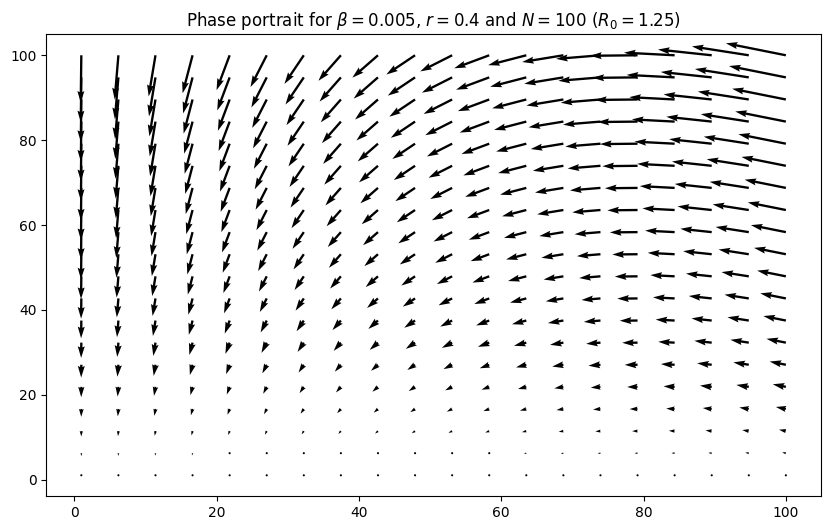

In [53]:
phase_portrait(0.005, 0.4)

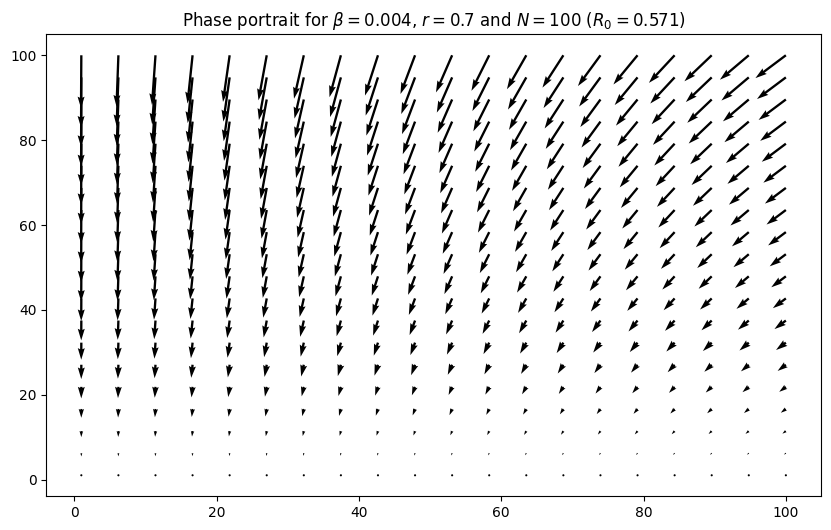

In [54]:
phase_portrait(0.004, 0.7)

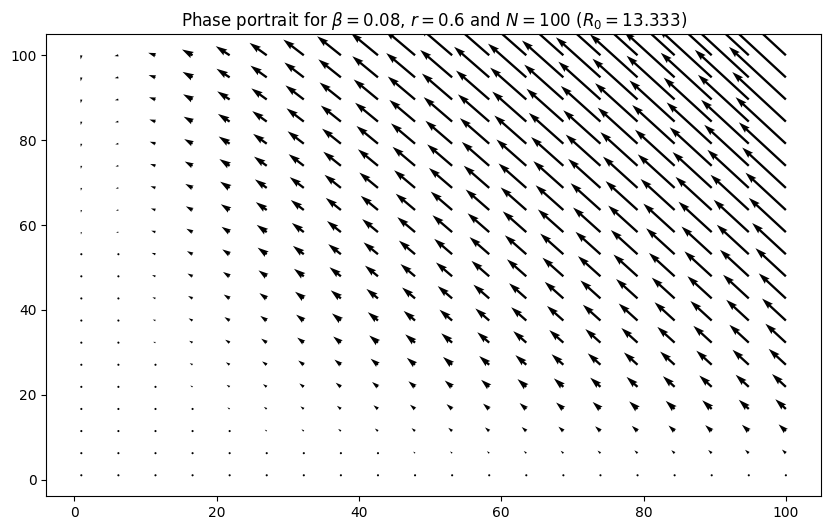

In [55]:
phase_portrait(0.08, 0.6)

### Analysis of total number of infected individuals for $R_0$ parameter

In [81]:
def SIR_analysis_r(betas, rs, N=10**6):
    """
    Function to generate the plot of total infected individuals depending on R_0 parameter
    
    * beta (list) - values for infectivity parameter
    * r (list) - values for recovery rate per capita
    * N (int) - population size
    """
    R_0 = np.zeros((len(betas), len(rs)))
    results = np.zeros((len(betas), len(rs)))
    for b in range(len(betas)):
        R_0[b] = [betas[b]*N/r for r in rs]
        for r in range(len(rs)):
            results[b][r] = SIR_euler(betas[b], rs[r], N=10**6, h=0.01, n=1000)['infected'].max()

        plt.plot(R_0[b], results[b], label=f'beta = {betas[b]}')
    plt.legend()
    plt.xlabel(r'$R_0$')
    plt.ylabel('Max. number of infected')
    plt.title('Total number of infections for different parameters')
    plt.show()
    #return results

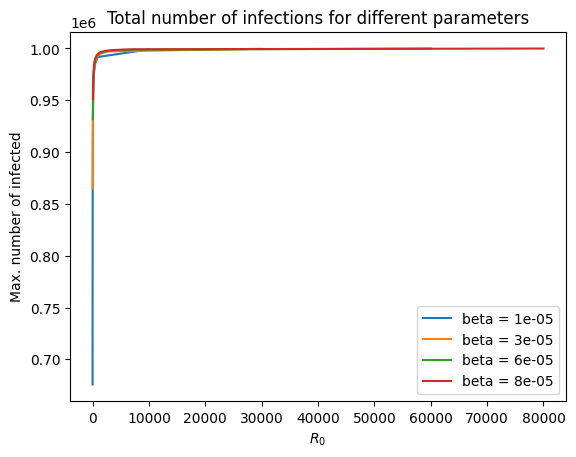

In [82]:
r_range = np.linspace(0.001, 0.999, 100)
beta_range = [0.00001, 0.00003, 0.00006, 0.00008]
SIR_analysis_r(beta_range, r_range)

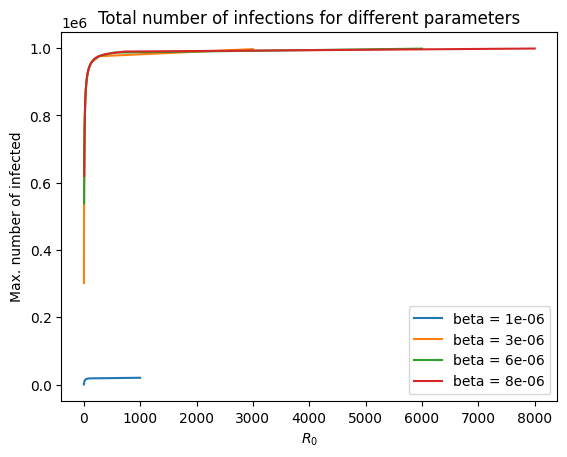

In [83]:
r_range = np.linspace(0.001, 0.999, 100)
beta_range = [0.000001, 0.000003, 0.000006, 0.000008]
SIR_analysis_r(beta_range, r_range)

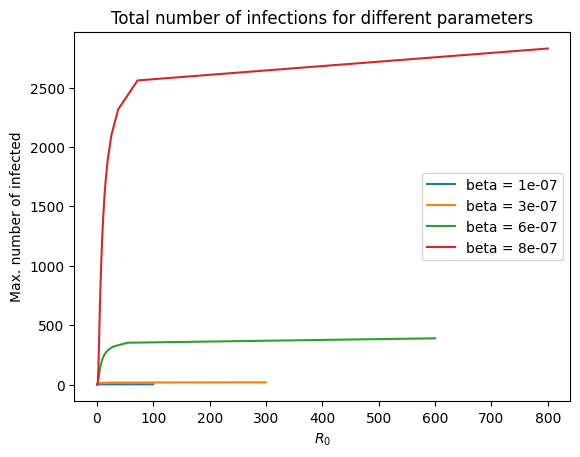

In [84]:
r_range = np.linspace(0.001, 0.999, 100)
beta_range = [0.0000001, 0.0000003, 0.0000006, 0.0000008]
SIR_analysis_r(beta_range, r_range)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAkQAAAHJCAYAAABkJibBAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAB7IUlEQVR4nO3de1xT9f8H8NcGDLltgNxEEfAu3m8hampKolKmVpb6zbtmaWmklpb30tK8lJVmecs0S39p5l3xnqiJgHjDSxilAl64yEUu2+f3h+7IZCDDwQZ7PR+PPRjnfHbO+7Mx9t7ndmRCCAEiIiIiCyY3dQBEREREpsaEiIiIiCweEyIiIiKyeEyIiIiIyOIxISIiIiKLx4SIiIiILB4TIiIiIrJ4TIiIiIjI4jEhIiIiIovHhIiM4uDBg5DJZDh48KCpQzGYNvZNmzaZOpQSSUpKwiuvvIKqVatCJpNh8eLFRZaVyWSYMWNGqc6Tn5+PSZMmwcfHB3K5HL179y7VcUrj2rVrkMlkWL16dbmd0xCmfG4K8vPzw5AhQ6Tfi3ofrl27Fg0aNICNjQ2cnZ2l7fPnz0etWrVgZWWF5s2bl0vMRObK2tQBUOnJZLISlTtw4AA6d+5cbJk5c+YgICDAZP/YqeTee+897N69G9OnT4eXlxdat25dJudZuXIl5s+fj/Hjx6Nly5aoWbOm0c+xfv16JCcnY/z48UY/dlkqj+fGWC5evIghQ4age/fu+PDDD2Fvbw8A2LNnDyZNmoT//e9/mDFjBtzc3EwcadGOHTuGPXv2YPz48ToJHem3Y8cOnDx5stRfhiwVE6IKbO3atTq///jjj9i7d2+h7Q0bNnzisebMmYNXXnmFCVEFsH//frz00kuYMGHCE8tmZ2fD2rp0b/P9+/ejevXqWLRoUakeXxLr16/H2bNnCyVEvr6+yM7Oho2NTZmd+2mUx3NTGh07dkR2djYUCoW07eDBg9BoNPjyyy9Rp04dafv+/fshl8uxYsUKnfLm6NixY5g5cyaGDBnChKgEduzYgW+++YYJkYGYEFVg//vf/3R+P378OPbu3VtoO5mHzMxMODg4PPVxkpOTS/yhUKVKlXI5j7HJZLKnir2sGfu50Wg0yM3Nfeo6y+XyQsdITk4GgELxJicnw87OzqjJUFZWltQCVdnl5+dDo9GYfTJpLEII3L9/H3Z2dqYOpewIqjTGjBkjHn9JMzIyRFhYmKhRo4ZQKBSiXr16Yv78+UKj0UhlABS6DR48WAghxLVr18Rbb70l6tWrJ6pUqSJcXV3FK6+8IuLj43XOc+DAAQFAHDhwoNgYp0+fLgCIy5cvi8GDBwuVSiWUSqUYMmSIyMzMlMrFx8cLAGLVqlWFjgFATJ8+vdAx4+LixMCBA4VSqRRubm7i448/FhqNRiQkJIhevXoJJycn4enpKb744gu9sW/YsEFMnjxZeHp6Cnt7e/Hiiy+KhISEQuc/fvy4CAkJEUqlUtjZ2YmOHTuKo0eP6q3nuXPnRP/+/YWzs7No3rx5sc/N1atXxSuvvCJcXFyEnZ2dCAwMFNu2bZP2r1q1Su9rVZyinqvinn/tc//4TfvaqtVqsWjRIhEQECBsbW2Fh4eHGDVqlLh7926h8+/YsUN07NhRODo6CicnJ9G6dWuxbt06IYQQnTp1KnQOX19fnRgef/3Dw8NFhw4dhL29vVCpVKJXr17i/Pnzep/7J/2NCSHEnj17RPv27YVKpRIODg6iXr16YvLkyUU+n096bkryftO+LmPGjBE//fSTCAgIENbW1mLz5s1Fnlej0YjZs2eL6tWrCzs7O9G5c2dx9uxZ4evrK71XhSj8PvT19S0Uq/b5efxW8Lleu3ataNmypahSpYpwcXERr732WqH3QqdOnUSjRo3EqVOnxLPPPivs7OzEuHHjhBBC3L9/X0ybNk3Url1bKBQKUaNGDTFx4kRx//59vc/D5s2bRaNGjYRCoRABAQFi586dhV7Px2+P/w8qKragoCBRpUoV4efnJ5YuXapTLicnR0ydOlW0bNlSKJVKYW9vLzp06CD279+vU077us+fP18sWrRI1KpVS8jlchEVFVWqY3z99dfC399f2NnZieeff14kJCQIjUYjZs2aJapXry6qVKkievXqJe7cuVOobjt27JDeA46OjqJnz57i7Nmz0v7BgwcX+3+ipO9fX19fERoaKnbt2iVatWolbG1txaJFi4QQhr9vKgq2EFViQgj06tULBw4cwPDhw9G8eXPs3r0bEydOxPXr16Xm/rVr12LEiBF45plnMGrUKABA7dq1AQB//fUXjh07htdffx01atTAtWvXsHTpUnTu3Bnnz58v9bfBfv36wd/fH3PnzsXp06fxww8/wMPDA59//nmp6/vaa6+hYcOG+Oyzz7B9+3Z88skncHV1xXfffYcuXbrg888/x7p16zBhwgS0adMGHTt21Hn8p59+CplMhg8++ADJyclYvHgxgoODER0dLX0r2r9/P3r06IFWrVph+vTpkMvlWLVqFbp06YIjR47gmWee0Tnmq6++irp162LOnDkQQhQZe1JSEtq1a4esrCy8++67qFq1KtasWYNevXph06ZN6NOnDzp27Ii1a9fijTfewPPPP49BgwaV+rkq7vl3d3fH2rVr8emnnyIjIwNz584F8Kjr9c0338Tq1asxdOhQvPvuu4iPj8fXX3+NqKgo/Pnnn1I31+rVqzFs2DA0atQIkydPhrOzM6KiorBr1y4MGDAAH330EdLS0vDff/9Jf4uOjo5Fxrxv3z706NEDtWrVwowZM5CdnY0lS5agffv2OH36NPz8/EpcRwA4d+4cXnjhBTRt2hSzZs2Cra0trly5gj///LPIGIp7bkr6ftPav38/fv31V4wdOxZubm6F4i9o2rRp+OSTT9CzZ0/07NkTp0+fRrdu3ZCbm1vkYwBg8eLF+PHHH7F582YsXboUjo6OaNq0KerUqYPly5fj5MmT+OGHHwAA7dq1A/DgfTB16lT069cPI0aMwK1bt7BkyRJ07NgRUVFROi1Nd+7cQY8ePfD666/jf//7Hzw9PaHRaNCrVy8cPXoUo0aNQsOGDREbG4tFixbh0qVL2LJli06MR48exW+//Ya3334bTk5O+Oqrr/Dyyy8jISEBVatWRd++fXHp0iX8/PPPWLRokTTWyd3dvdi6p6SkoGfPnujXrx/69++PX3/9FW+99RYUCgWGDRsGAEhPT8cPP/yA/v37Y+TIkbh37x5WrFiBkJAQnDx5stBA81WrVuH+/fsYNWoUbG1t4erqavAx1q1bh9zcXLzzzju4e/cu5s2bh379+qFLly44ePAgPvjgA1y5cgVLlizBhAkTsHLlSumxa9euxeDBgxESEoLPP/8cWVlZWLp0KTp06ICoqCj4+fnhzTffxI0bN/QOnwBK/v4FgLi4OPTv3x9vvvkmRo4cifr165fqfVNhmDghIyN6vIVoy5YtAoD45JNPdMq98sorQiaTiStXrkjbHBwcdL5pamVlZRXaFhERIQCIH3/8UdpmaAvRsGHDdLb36dNHVK1aVfq9NC1Eo0aNkrbl5+eLGjVqCJlMJj777DNpe0pKirCzs9P7rbp69eoiPT1d2v7rr78KAOLLL78UQjz4ll63bl0REhKi840/KytL+Pv7i+eff75QTP379y/2+dAaP368ACCOHDkibbt3757w9/cXfn5+Qq1W69R/zJgxJTpuUc/Vk55/IR59yy7oyJEjAoDUyqO1a9cune2pqanCyclJBAYGiuzsbJ2yBZ+70NBQqVWoIH2vf/PmzYWHh4fOt+aYmBghl8vFoEGDDK7jokWLBABx69atQud/En3PjSHvNwBCLpeLc+fOPfFcycnJQqFQiNDQUJ3nbsqUKTqtuULofx9qn4/H6zl48GDh4OCgs+3atWvCyspKfPrppzrbY2NjhbW1tc52bQvfsmXLdMquXbtWyOVynb9lIYRYtmyZACD+/PNPnedBoVDoPDcxMTECgFiyZIm0bf78+U9sFSpIG9uCBQukbTk5OdLfUG5urhDiwf+JnJwcncempKQIT09Pnb8f7d+jUqkUycnJOuUNPYa7u7tITU2Vtk+ePFkAEM2aNRN5eXnS9v79+wuFQiG1qt27d084OzuLkSNH6pwrMTFRqFQqne36eguEKPn7V4hHrYu7du3SKfs07xtzx2n3ldiOHTtgZWWFd999V2f7+++/DyEEdu7c+cRjFOwvzsvLw507d1CnTh04Ozvj9OnTpY5t9OjROr8/++yzuHPnDtLT00t9zBEjRkj3rays0Lp1awghMHz4cGm7s7Mz6tevj7///rvQ4wcNGgQnJyfp91deeQXVqlXDjh07AADR0dG4fPkyBgwYgDt37uD27du4ffs2MjMz0bVrVxw+fBgajabYehZlx44deOaZZ9ChQwdpm6OjI0aNGoVr167h/PnzJXsSSqi0z//GjRuhUqnw/PPPS/W/ffs2WrVqBUdHRxw4cAAAsHfvXty7dw8ffvhhoTEtJZ0dWdDNmzcRHR2NIUOGwNXVVdretGlTPP/889JrZEgdtS0dv//+e6HXrTQMfb916tQJAQEBTzzuvn37pBaFgs9dWczM++2336DRaNCvXz+d19fLywt169aVXl8tW1tbDB06VGfbxo0b0bBhQzRo0EDnGF26dAGAQscIDg6WWqSBB6+pUqnU+x41hLW1Nd58803pd4VCgTfffBPJycmIjIwE8OD/hHYMkEajwd27d5Gfn4/WrVvr/f/28ssvF2qZMvQYr776KlQqlfR7YGAggAdjQgtOgAgMDERubi6uX78O4MF7KjU1Ff3799d5Xq2srBAYGFjoedWnpO9fLX9/f4SEhOhsM/b7xpywy6wS++eff+Dt7a3zIQ886vr4559/nniM7OxszJ07F6tWrcL169d1un3S0tJKHdvj05RdXFwAPGjmViqVRjmmSqVClSpVCk0nVqlUuHPnTqHH161bV+d3mUyGOnXq4Nq1awCAy5cvAwAGDx5cZAxpaWlSXYAH/1BK4p9//pH+MRZU8LVq3LhxiY5VEqV9/i9fvoy0tDR4eHjo3a8dwHv16lUAMFrM2r/V+vXrF9rXsGFD7N69u9Cg9SfV8bXXXsMPP/yAESNG4MMPP0TXrl3Rt29fvPLKK5DLDf+uaOj7zZC/DaDw36e7u7vO35oxXL58GUKIQufSenzWX/Xq1QsNKr58+TIuXLhQZJeW9m9ES9+SBS4uLkhJSTEk9EK8vb0LTWKoV68egAfrXLVt2xYAsGbNGixYsAAXL15EXl6eVFbf61PUa2bIMfT9nwIAHx8fvdu1z4P2/482sXxcSf5vlvT9q6UvfmO/b8wJEyIq1jvvvINVq1Zh/PjxCAoKgkqlgkwmw+uvv/5U3w6srKz0btcmXEW1IqjVaoOO+aTzGEJb3/nz5xe5iN3jY2DMdUZGaZ8XjUYDDw8PrFu3Tu/+J43rKE9PqqOdnR0OHz6MAwcOYPv27di1axd++eUXdOnSBXv27Cny8cZijn8bGo0GMpkMO3fu1Fv/kvx9azQaNGnSBAsXLtR7jsc/+I35HjXUTz/9hCFDhqB3796YOHEiPDw8YGVlhblz50pJfUH66mvoMYqq75OeB+3/n7Vr18LLy6tQuZIsr2Ho+1dffU39vilLTIgqMV9fX+zbtw/37t3T+dZ68eJFab9WUQnIpk2bMHjwYCxYsEDadv/+faSmppZN0A9pv/k+fp6StGqVlvYbmJYQAleuXEHTpk0BPBporlQqERwcbNRz+/r6Ii4urtB2fa+VKdWuXRv79u1D+/bti/1A1z5XZ8+e1Vn75nEl7T7T1r+o58jNza1USxrI5XJ07doVXbt2xcKFCzFnzhx89NFHOHDggMGvsSHvN0OPCzz4+6xVq5a0/datW0/divK42rVrQwgBf39/qTWlNMeIiYlB165dS9U9qk9pjnPjxo1CrYaXLl0CAGkA+6ZNm1CrVi389ttvOueYPn16ic9jjGOUhPY95eHh8cS/zaKer5K+f5/EmO8bc1Kx27eoWD179oRarcbXX3+ts33RokWQyWTo0aOHtM3BwUFvkmNlZVXom9qSJUuKbakxBqVSCTc3Nxw+fFhn+7fffltm5/zxxx9x79496fdNmzbh5s2b0vPUqlUr1K5dG1988QUyMjIKPf7WrVulPnfPnj1x8uRJRERESNsyMzOxfPly+Pn5lWisSXno168f1Go1Zs+eXWhffn6+9DfUrVs3ODk5Ye7cubh//75OuYJ/Tw4ODiXqeq1WrRqaN2+ONWvW6Pydnj17Fnv27EHPnj0Nrsvdu3cLbdO2/OXk5Bh8PEPeb4YIDg6GjY0NlixZovPcFXfJltLq27cvrKysMHPmzELveyGE3q7mx/Xr1w/Xr1/H999/X2hfdnY2MjMzDY5Lm9QY8kUsPz8f3333nfR7bm4uvvvuO7i7u6NVq1YAHrXKFKzriRMndN6HT2KMY5RESEgIlEol5syZo9Mtp1Xw/09Rz1dJ37/FMfb7xpywhagSe/HFF/Hcc8/ho48+wrVr19CsWTPs2bMHv//+O8aPH68zkLFVq1bYt28fFi5cCG9vb/j7+yMwMBAvvPAC1q5dC5VKhYCAAERERGDfvn2oWrVqmcc/YsQIfPbZZxgxYgRat26Nw4cPS9/wyoKrqys6dOiAoUOHIikpCYsXL0adOnUwcuRIAA++Ff3www/o0aMHGjVqhKFDh6J69eq4fv06Dhw4AKVSiT/++KNU5/7www/x888/o0ePHnj33Xfh6uqKNWvWID4+Hv/3f/9nNn3znTp1wptvvom5c+ciOjoa3bp1g42NDS5fvoyNGzfiyy+/xCuvvAKlUolFixZhxIgRaNOmDQYMGAAXFxfExMQgKysLa9asAfDg7+6XX35BWFgY2rRpA0dHR7z44ot6zz1//nz06NEDQUFBGD58uDTtXqVSlWpF3lmzZuHw4cMIDQ2Fr68vkpOT8e2336JGjRo6g9tLypD3myHc3d0xYcIEzJ07Fy+88AJ69uyJqKgo7Ny50+iX26hduzY++eQTTJ48GdeuXUPv3r3h5OSE+Ph4bN68GaNGjXriCulvvPEGfv31V4wePRoHDhxA+/btoVarcfHiRfz666/YvXu3wZeb0SYwH330EV5//XXY2NjgxRdfLLZV0NvbG59//jmuXbuGevXq4ZdffkF0dDSWL18ujYV64YUX8Ntvv6FPnz4IDQ1FfHw8li1bhoCAAL1fevQxxjFKQqlUYunSpXjjjTfQsmVLvP7663B3d0dCQgK2b9+O9u3bS8m49vl69913ERISAisrK7z++uslfv8Wx9jvG7NSvpPaqCzpm2p579498d577wlvb29hY2Mj6tatq3ehuIsXL4qOHTsKOzs7nam8KSkpYujQocLNzU04OjqKkJAQcfHixScuCFeUoqYAaxcdLDitNisrSwwfPlyoVCrh5OQk+vXrJ5KTk4ucSl6SacVCFJ4yrY39559/FpMnTxYeHh7Czs5OhIaGin/++afQ46OiokTfvn1F1apVha2trfD19RX9+vUT4eHhT4ypONqFGZ2dnUWVKlXEM888o7MwoxaMMO2+JM+/vqnlWsuXLxetWrUSdnZ2wsnJSTRp0kRMmjRJ3LhxQ6fc1q1bRbt27YSdnZ1QKpXimWeeET///LO0PyMjQwwYMEA4OzuXaGHGffv2ifbt20vHe/HFF4tcmPFJdQwPDxcvvfSS8Pb2FgqFQnh7e4v+/fuLS5cuFfV0PvG5Ken7zZDXUIgHi+nNnDlTVKtWzaCFGYt7Pop6fwghxP/93/+JDh06CAcHB+Hg4CAaNGggxowZI+Li4p74HAghRG5urvj8889Fo0aNhK2trXBxcRGtWrUSM2fOFGlpaU98Hh6vlxBCWphSLpeXamFGX19f8fXXX+uU02g0Ys6cOcLX11fY2tqKFi1aiG3btonBgwfrLAdRcFHFxz3tMbSv2caNG3W2a/9e//rrr0LlQ0JChEqlElWqVBG1a9cWQ4YMEadOnZLK5Ofni3feeUe4u7sLmUxW6HOhJO9f7cKMj3ua9425kwlRDiPXiIiIyknnzp1x+/ZtnD171tShUAViHu3wRERERCbEhIiIiIgsHhMiIiIisngcQ0REREQWjy1EREREZPGYEBEREZHF48KMJaDRaHDjxg04OTkZbSl6IiIiKltCCNy7dw/e3t5PXOCWCVEJ3Lhxo9AFCYmIiKhi+Pfff1GjRo1iyzAhKgHthRr//fdfKJVKE0dDREREJZGeng4fHx+dCy4XhQlRCWi7yZRKJRMiIiKiCqYkw104qJqIiIgsHhMiIiIisnhMiIiIiMjiMSEiIiIii8eEiIiIiCweEyIiIiKyeEyIiIiIyOIxISIiIiKLx4SIiIiILB4TIiIiIrJ4TIiIiIjI4jEhIiIiIovHi7sSERFRudDk5ECdkiLd8lNSoE5NhTolFTJra7iNftNksTEhIiIiIoOJ3FzkP0xm1CkpUKcWSHJSUh8mOgWSn9RUiKysIo9n7e7OhIiIiIhMR+TnQ52Wpttyk1IgoUnVtuY8KqPJyCjdyaytYeXsDGsXZ1g5u8DK5cHN2t3duJUyNCyTnp2IiIiMSqjVUKenP2ylSSk6yUlJQX7qg22a9PTSnUwuh5Wz88OkxvlhouOik+hYuTzc9vAmd3SETCYzbqWNgAkRERGRmRIaDTT37unvikrVn+So09IAIUp1PiuVqkAi81iSo705P0py5EolZPLKMT+LCREREVE5EEJAk5lZeFCx3vE2j7ZDrS7V+eROTo9aaHRabIpIdJRKyKwtNy2w3JoTERGVkhACIjv7YVKjb1Bx4UQnPzUVyMsr1fnk9vaFEhprnRabx7usnCGzsTFupSs5JkRERGTxNPfv6yYvRQ0qLpDkiJycUp1LZmf3KHl5bKyNlYuL3u4puUJh5BrT45gQERFRpaLJzS0woDi18HRwPV1TIju7VOeS2djAytVVt9XG2bnoQcXOzpDb2Rm5xmQMTIiIiMhsibw8aTq4TkJTzMBiTWZm6U5mba1nvM3DVhtpJtWjLiprF2fI7O3NcsYUGY4JERERlYtH08GLmAquM97GuNPBi5wKXiDRMdfp4FQ+mBAREZHB9E4H17daccFEp7TTwWWyB9PBC7bSFDGoWJvkVKbp4FQ+mBAREVk4IQQ0GRk6yUuxg4ofloNGU6rzyZXKR11TOklO4UX8pOngVlbGrTTRY5gQERFVIkIIiKws3angOkmObqKj7ZpCfn6pzid3cNDTDaWdAq4nyVGpOB2czBITIiIiM6a5f7+YqeCpegcVi9zcUp1LOx1c3yJ+j4+34XRwqmyYEBERlRPd6eB6FvEr2GX1tNPBFYoiWm70TwXndHCydEyIiIhKoejp4EUPKi71dHAbm0fTvgteSLPgIn4FpoJbubhAZmfHGVNEBmBCREQWT6jVUnKjTWCKW8RPnZICzb17pTuZldXDpKZA11RRs6e008EdHJjcEJUxJkREVKkIjQaa9PQCl1lIQbGzp1JSoE5Pf7rp4EWNt9EzqFju5MTp4ERmiAkREZktnengRUwFL9SaY6zp4EVeSLNAaw6ngxNVGkyIiKhc6J0OXszsqaeeDu7oWLKVigtOB7fmv0QiS8V3PxGViiY7u+jxNnqmgqtTUiDy8kp1Lpm9/WPXknLW03JTINFxdoaM08GJyABMiIjo4XTwFOgOINYmM4UX8VOnpEDcv1+qc8kUCunq4NYFF+/Tl+RoL8NQpYqRa0xEpIsJEVElI/Ly9IyrKX72lCYrq3QnKzgd/AmrFXM6OBGZMyZERGbs8engRV56ITW1bKaDFzXe5mESxOngRFRZMCEiKidCo3mQ3GiTl+IGFWuniT/NdHA9C/lZPz7WpuBaN46OnA5ORBaLCRFRKQghoLl377HxNk8YVJyWVvrp4CpV4a4pbWuOzraH3VScDk5EZBAmRGTxhBDQZGbptNhIrTZ6E53UB2vdPM108IJdUc5PSHI4HZyIqMzxvyxVOtrp4EVOBX88yTHmdPCipoJLY3M4HZyIyBwxISKzpsnJkS65UNxqxdpWm6eaDm5r+2A6uLOz7nTwIq4vZeXsDLmtrZFrTEREpsCEiMqNyM19NNYmVXc6uP4LaaZCPM108KLG2xSR6Mjt7IxbYSIiqjCYEFGpiPz8wtPBH+uKKriInzolBZqMjNKdzMqq8CJ+Lto1bvS13LhA7mDP6eBERFRiTIioWPkpKbiz7DvkJiTotNxo0tJKd8CC08GLusaUs0p3OriTE5MbIiIqU0yIqEhCCNyYOAmZR48WWUbvdHB9U8EfdllxOjgREZkjJkRUpNRNm5B59ChktrbwmDQR1h4euomOUsnp4EREVCnw04z0yrt+HcmffQ4AcB8/Hq4DB5o4IiIiorLDdfqpECEEbnz8MTSZmbBr2RKug94wdUhERERlyqQJ0dy5c9GmTRs4OTnBw8MDvXv3RlxcnE6Zzp07QyaT6dxGjx6tUyYhIQGhoaGwt7eHh4cHJk6ciPzHVhE+ePAgWrZsCVtbW9SpUwerV68u6+pVWKm//IKsiOOQVakC7zmfcswPERFVeiZNiA4dOoQxY8bg+PHj2Lt3L/Ly8tCtWzdkZmbqlBs5ciRu3rwp3ebNmyftU6vVCA0NRW5uLo4dO4Y1a9Zg9erVmDZtmlQmPj4eoaGheO655xAdHY3x48djxIgR2L17d7nVtaLI/e8/JM2bDwDwCHsPCj8/0wZERERUDmRClOZS2mXj1q1b8PDwwKFDh9CxY0cAD1qImjdvjsWLF+t9zM6dO/HCCy/gxo0b8PT0BAAsW7YMH3zwAW7dugWFQoEPPvgA27dvx9mzZ6XHvf7660hNTcWuXbueGFd6ejpUKhXS0tKgVCqfvqJmSmg0SBg6DFknTsCudSv4/vgjr35OREQVliGf32b1aZf2cG0bV1dXne3r1q2Dm5sbGjdujMmTJyOrwOrFERERaNKkiZQMAUBISAjS09Nx7tw5qUxwcLDOMUNCQhAREaE3jpycHKSnp+vcLEHKzz8j68QJyOzs4D1nDpMhIiKyGGYzy0yj0WD8+PFo3749GjduLG0fMGAAfH194e3tjTNnzuCDDz5AXFwcfvvtNwBAYmKiTjIEQPo9MTGx2DLp6enIzs6G3WOXbJg7dy5mzpxp9Dqas9yEBCR/sQAA4DHhfShq1jRxREREROXHbBKiMWPG4OzZszj62CKAo0aNku43adIE1apVQ9euXXH16lXUrl27TGKZPHkywsLCpN/T09Ph4+NTJucyB0KjwY0pUyCys2EfGAiX/v1NHRIREVG5Mos+kbFjx2Lbtm04cOAAatSoUWzZwMBAAMCVK1cAAF5eXkhKStIpo/3dy8ur2DJKpbJQ6xAA2NraQqlU6twqs5SffkL2qUjI7e1R7dNP2VVGREQWx6SffEIIjB07Fps3b8b+/fvh7+//xMdER0cDAKpVqwYACAoKQmxsLJKTk6Uye/fuhVKpREBAgFQmPDxc5zh79+5FUFCQkWpSceXExyN54SIAgMekSVDUqG7iiIiIiMqfSROiMWPG4KeffsL69evh5OSExMREJCYmIjs7GwBw9epVzJ49G5GRkbh27Rq2bt2KQYMGoWPHjmjatCkAoFu3bggICMAbb7yBmJgY7N69Gx9//DHGjBkDW1tbAMDo0aPx999/Y9KkSbh48SK+/fZb/Prrr3jvvfdMVndzINRq3JzyEcT9+3BoFwTn1/qZOiQiIiLTECYEQO9t1apVQgghEhISRMeOHYWrq6uwtbUVderUERMnThRpaWk6x7l27Zro0aOHsLOzE25ubuL9998XeXl5OmUOHDggmjdvLhQKhahVq5Z0jpJIS0sTAAqdt6K7vWKlOF+/gbjYspXI/e8/U4dDRERkVIZ8fpvVOkTmqjKuQ5Tz99+I79MXIicHXrNnweXVV00dEhERkVFV2HWIqHwItRo3Jk+GyMmBQ4cOcH7lFVOHREREZFJMiCzQ3VWrcD/mDOROTqj2yWzIZDJTh0RERGRSTIgsTM6VK7j15VcAAM/Jk2HzcGkCIiIiS8aEyIKI/Hzc+HAyRF4eHDt1gqpPb1OHREREZBaYEFmQOz+swP2zZyFXKuE1axa7yoiIiB5iQmQh7sddwq1vvgEAeH00BTaeHiaOiIiIyHwwIbIAIi8PNyZ/COTlwbFLFyh79TJ1SERERGaFCZEFuL18OXLOX4CVSoVqM2ewq4yIiOgxTIgqufsXLuD20mUAAM+pU2Ht7m7iiIiIiMwPE6JKTOTm4sbkKUB+Ppyefx7K0J6mDomIiMgsMSGqxG4v+w45Fy/CysUFXjOms6uMiIioCEyIKqnsc+dw+7vvAABe06fBumpVE0dERERkvpgQVUKa3Fzc/HAyoFbDqXt3KLt3N3VIREREZo0JUSV0e+lS5Fy+DCtXV3hNm2rqcIiIiMweE6JKRmg0SP15AwDAa+rHsHZ1NXFERERE5o8JUSWTc/Ei1KmpkDs4wCk42NThEBERVQhMiCqZzIgIAIB9mzaQ2diYOBoiIqKKgQlRJZMZcRwA4BDU1sSREBERVRxMiCoRTW4usiIjAQD2QUEmjoaIiKjiYEJUiWRHR0NkZ8PKzQ22deuaOhwiIqIKgwlRJZJ1/GF3WWAgV6UmIiIyABOiSkQaP9SO3WVERESGYEJUSagzMpB95gwAwKEtB1QTEREZgglRJZH111+AWg2bmjVhU726qcMhIiKqUJgQVRLS+CHOLiMiIjIYE6JKIvPYgwUZuf4QERGR4ZgQVQL5t28j5/JlAIB9YKCJoyEiIqp4mBBVApnHTwAAbAMawtrFxcTREBERVTxMiCqBzIhjAACHthw/REREVBpMiCo4IQSyeP0yIiKip8KEqILL+/df5N24AdjYwL5VK1OHQ0REVCExIargtLPL7Js1g9ze3sTREBERVUxMiCq4zIfrD9mzu4yIiKjUmBBVYEKjKbAgYzsTR0NERFRxMSGqwHIuXoQ6NRVye3vYNWls6nCIiIgqLCZEFZj26vb2bdpAZmNj4miIiIgqLiZEFZh2/JBDO64/RERE9DSYEFVQIjcXWadOAQDsuSAjERHRU7EuSaGtW7eW+IC9evUqdTBUctkxMRDZ2bCqWhW29eqaOhwiIqIKrUQJUe/evXV+l8lkEELo/K6lVquNExkVSzt+yKFtW53nn4iIiAxXoi4zjUYj3fbs2YPmzZtj586dSE1NRWpqKnbs2IGWLVti165dZR0vPZQVdRoAYB/4jIkjISIiqvhK1EJU0Pjx47Fs2TJ06NBB2hYSEgJ7e3uMGjUKFy5cMGqApF9u/DUAQJV69UwbCBERUSVg8KDqq1evwtnZudB2lUqFa9euGSEkehJNVhbyExMBAAo/P9MGQ0REVAkYnBC1adMGYWFhSEpKkrYlJSVh4sSJeOYZdt+Uh9yEBACAlbMzrPQkp0RERGQYgxOilStX4ubNm6hZsybq1KmDOnXqoGbNmrh+/TpWrFhRFjHSY3IftsSxdYiIiMg4DB5DVKdOHZw5cwZ79+7FxYsXAQANGzZEcHAwZzuVEyZERERExmVwQgQ8mGbfrVs3dOzYEba2tkyEypl2QDUTIiIiIuMwuMtMo9Fg9uzZqF69OhwdHREfHw8AmDp1KrvMyglbiIiIiIzL4ITok08+werVqzFv3jwoFAppe+PGjfHDDz8YdKy5c+eiTZs2cHJygoeHB3r37o24uDidMvfv38eYMWNQtWpVODo64uWXX9YZ0A0ACQkJCA0Nhb29PTw8PDBx4kTk5+frlDl48CBatmwJW1tb1KlTB6tXrzas4mZCCIEcbULk72fSWIiIiCoLgxOiH3/8EcuXL8fAgQNhZWUlbW/WrJk0pqikDh06hDFjxuD48ePYu3cv8vLy0K1bN2RmZkpl3nvvPfzxxx/YuHEjDh06hBs3bqBv377SfrVajdDQUOTm5uLYsWNYs2YNVq9ejWnTpkll4uPjERoaiueeew7R0dEYP348RowYgd27dxtafZNTp6ZCk5YGAFDUrGniaIiIiCoJYaAqVaqIa9euCSGEcHR0FFevXhVCCHHu3Dnh4OBg6OF0JCcnCwDi0KFDQgghUlNThY2Njdi4caNU5sKFCwKAiIiIEEIIsWPHDiGXy0ViYqJUZunSpUKpVIqcnBwhhBCTJk0SjRo10jnXa6+9JkJCQkoUV1pamgAg0tLSnqp+xpAZeVqcr99AXOr8nKlDISIiMmuGfH4b3EIUEBCAI0eOFNq+adMmtGjR4qmSs7SHLR+urq4AgMjISOTl5SE4OFgq06BBA9SsWRMREREAgIiICDRp0gSenp5SmZCQEKSnp+PcuXNSmYLH0JbRHuNxOTk5SE9P17mZC+34IVt2lxERERmNwbPMpk2bhsGDB+P69evQaDT47bffEBcXhx9//BHbtm0rdSAajQbjx49H+/bt0bhxYwBAYmIiFApFoZWxPT09kfhwpebExESdZEi7X7uvuDLp6enIzs6GnZ2dzr65c+di5syZpa5LWeKAaiIiIuMzuIXopZdewh9//IF9+/bBwcEB06ZNw4ULF/DHH3/g+eefL3UgY8aMwdmzZ7Fhw4ZSH8NYJk+ejLS0NOn277//mjokCRMiIiIi4yvVOkTPPvss9u7da7Qgxo4di23btuHw4cOoUaOGtN3Lywu5ublITU3VaSVKSkqCl5eXVObkyZM6x9POQitY5vGZaUlJSVAqlYVahwDA1tYWtra2RqmbsTEhIiIiMj6DW4hq1aqFO3fuFNqempqKWrVqGXQsIQTGjh2LzZs3Y//+/fD399fZ36pVK9jY2CA8PFzaFhcXh4SEBAQFBQEAgoKCEBsbi+TkZKnM3r17oVQqERAQIJUpeAxtGe0xKgqh0SD3n38AMCEiIiIyJoNbiK5duwa1Wl1oe05ODq5fv27QscaMGYP169fj999/h5OTkzTmR6VSwc7ODiqVCsOHD0dYWBhcXV2hVCrxzjvvICgoCG3btgUAdOvWDQEBAXjjjTcwb948JCYm4uOPP8aYMWOkVp7Ro0fj66+/xqRJkzBs2DDs378fv/76K7Zv325o9U0qPzERIicHsLGBjbe3qcMhIiKqNEqcEG3dulW6v3v3bqhUKul3tVqN8PBw+BnYarF06VIAQOfOnXW2r1q1CkOGDAEALFq0CHK5HC+//DJycnIQEhKCb7/9ViprZWWFbdu24a233kJQUBAcHBwwePBgzJo1Syrj7++P7du347333sOXX36JGjVq4IcffkBISIhB8ZpazsNVwRU+PpBZl6q3k4iIiPSQCSFESQrK5Q9612QyGR5/iI2NDfz8/LBgwQK88MILxo/SxNLT06FSqZCWlgalUmmyOO6uW4ek2Z/AsUsX+Hz7jcniICIiqggM+fwucTODRqMB8KC15a+//oKbm9vTRUkGy73G8UNERERlweB+F+3FXKn8PZph5mvaQIiIiCoZg2eZvfvuu/jqq68Kbf/6668xfvx4Y8REReCUeyIiorJhcEL0f//3f2jfvn2h7e3atcOmTZuMEhQVpsnNRd7DWXxMiIiIiIzL4ITozp07OjPMtJRKJW7fvm2UoKiwvH//BTQayO3tYe3ubupwiIiIKhWDE6I6depg165dhbbv3LnT4IUZqeS0rUM2Pj6QyWQmjoaIiKhyMXhQdVhYGMaOHYtbt26hS5cuAIDw8HAsWLAAixcvNnZ89FD+w5W4rT09TBwJERFR5WNwQjRs2DDk5OTg008/xezZswEAfn5+WLp0KQYNGmT0AOmB/Fu3AIDdZURERGWgVMsdv/XWW3jrrbdw69Yt2NnZwdHR0dhx0WPytC1EHmwhIiIiMjaDxxABQH5+Pvbt24fffvtNWrX6xo0byMjIMGpw9AhbiIiIiMqOwS1E//zzD7p3746EhATk5OTg+eefh5OTEz7//HPk5ORg2bJlZRGnxctPfpAQ2bCFiIiIyOgMbiEaN24cWrdujZSUFNjZ2Unb+/Tpg/DwcKMGR49ILURMiIiIiIzO4BaiI0eO4NixY1AoFDrb/fz8cP3h1HAyLqHRsMuMiIioDBncQqTRaKBWqwtt/++//+Dk5GSUoEiXOiUFyM8HAFjzorpERERGZ3BC1K1bN531hmQyGTIyMjB9+nT07NnTmLHRQ9rWIStXV8hsbEwcDRERUeVjcJfZggULEBISgoCAANy/fx8DBgzA5cuX4ebmhp9//rksYrR4+ZxyT0REVKYMTohq1KiBmJgY/PLLL4iJiUFGRgaGDx+OgQMH6gyyJuPh+CEiIqKyVaKEqGXLlggPD4eLiwtmzZqFCRMmYODAgRg4cGBZx0co2ELEhIiIiKgslCghunDhAjIzM+Hi4oKZM2di9OjRsLe3L+vY6CGuUk1ElkYIgfz8fL2TeIgKsrGxgZWV1VMfp0QJUfPmzTF06FB06NABQgh88cUXRV6uY9q0aU8dFOlilxkRWZLc3FzcvHkTWVlZpg6FKgCZTIYaNWo89WXESpQQrV69GtOnT8e2bdsgk8mwc+dOWFsXfqhMJmNCVAa4SjURWQqNRoP4+HhYWVnB29sbCoUCMpnM1GGRmRJC4NatW/jvv/9Qt27dp2opKlFCVL9+fWzYsAEAIJfLER4eDg9+OJcbthARkaXIzc2FRqOBj48Ph2ZQibi7u+PatWvIy8sr+4SoII1GU+qTkeF0VqlmEkpEFkIuL9W1x8kCGasF0eCECAAuX76MAwcOIDk5uVCCxC4z41Knpj5apbpqVdMGQ0REVEkZnBB9//33eOutt+Dm5gYvLy+dzIxjiIxPO+XeytUVsseuH0dERETGYXBC9Mknn+DTTz/FBx98UBbx0GO4SjURkfnr3LkzmjdvrnNpK6pYDO6kTUlJwauvvloWsZAe+bduA+BFXYmIKrvVq1fD2dnZ1GEAAH777Td069YNVatWhUwmQ3R0tNGOvXHjRjRo0ABVqlRBkyZNsGPHDp39MplM723+/PlGi0EfgxOiV199FXv27CmLWEgPdWoKAMDK1cXEkRARkaXIzMxEhw4d8Pnnnxv1uMeOHUP//v0xfPhwREVFoXfv3ujduzfOnj0rlbl586bObeXKlZDJZHj55ZeNGsvjDE6I6tSpg6lTp2LIkCFYsGABvvrqK50bGZc6NRUAYGUm3xqIiMqTEAJZufkmuQkhDIo1Pz8fY8eOhUqlgpubG6ZOnapzjJycHEyYMAHVq1eHg4MDAgMDcfDgQQDAwYMHMXToUKSlpUktIjNmzAAArF27Fq1bt4aTkxO8vLwwYMAAJD8cTlFW3njjDUybNg3BwcFFlklNTcWIESPg7u4OpVKJLl26ICYmptjjfvnll+jevTsmTpyIhg0bYvbs2WjZsiW+/vprqYyXl5fO7ffff8dzzz2HWrVqGa1++hg8hmj58uVwdHTEoUOHcOjQIZ19MpkM7777rtGCIyZERGTZsvPUCJi22yTnPj8rBPaKkn9MrlmzBsOHD8fJkydx6tQpjBo1CjVr1sTIkSMBAGPHjsX58+exYcMGeHt7Y/PmzejevTtiY2PRrl07LF68GNOmTUNcXBwASCsv5+XlYfbs2ahfvz6Sk5MRFhaGIUOGFOpqKmj06NH46aefio03IyOjxHXT59VXX4WdnR127twJlUqF7777Dl27dsWlS5fg6uqq9zEREREICwvT2RYSEoItW7boLZ+UlITt27djzZo1TxVrSRicEMXHx5dFHFQEJkRERBWDj48PFi1aBJlMhvr16yM2NhaLFi3CyJEjkZCQgFWrViEhIQHe3t4AgAkTJmDXrl1YtWoV5syZA5VKBZlMBi8vL53jDhs2TLpfq1YtfPXVV2jTpg0yMjKKvFyF9kLsZeXo0aM4efIkkpOTYWtrCwD44osvsGXLFmzatAmjRo3S+7jExER4enrqbPP09ERiYqLe8mvWrIGTkxP69u1r3AroUap1iKj8qFNSAQDWTIiIyALZ2Vjh/KwQk53bEG3bttVZiiYoKAgLFiyAWq1GbGws1Go16tWrp/OYnJwcVH3CGnORkZGYMWMGYmJikJKSIq3/l5CQgICAAL2P8fDwKNMrSsTExCAjI6NQ7NnZ2bh69Wqh2KZMmYIpU6YYfJ6VK1di4MCBqFKlylPH/CQlSojCwsIwe/ZsODg4FGrqetzChQuNEhg9oE5LBcAWIiKyTDKZzKBuK3OVkZEBKysrREZGFrq8RHEXJc3MzERISAhCQkKwbt06uLu7IyEhASEhIcjNzS3ycWXdZZaRkYFq1apJY6AKcnZ2hrOzs87MNG0XmpeXF5KSknTKJyUlFWoVA4AjR44gLi4Ov/zyS6njNESJ/sqioqKQl5cn3S8KL8BnfPnsMiMiqhBOnDih8/vx48elC462aNECarUaycnJePbZZ/U+XqFQQK1W62y7ePEi7ty5g88++ww+Pj4AgFOnTj0xlrLuMmvZsiUSExNhbW0NPz8/vWXq1KlTaFtQUBDCw8Mxfvx4advevXsRFBRUqOyKFSvQqlUrNGvWzFhhF6tECdGBAwf03qeyJYSAOjUNABMiIiJzl5CQgLCwMLz55ps4ffo0lixZggULFgAA6tWrh4EDB2LQoEFYsGABWrRogVu3biE8PBxNmzZFaGgo/Pz8kJGRgfDwcDRr1gz29vaoWbMmFAoFlixZgtGjR+Ps2bOYPXv2E2N52i6zu3fvIiEhATdu3AAAaaC3duZXcHAwgoKC0Lt3b8ybNw/16tXDjRs3sH37dvTp0wetW7fWe9xx48ahU6dOWLBgAUJDQ7FhwwacOnUKy5cv1ymXnp6OjRs3Ss9fuRD0RGlpaQKASEtLK9fz5t/LEOfrNxDn6zcQ6szMcj03EZEpZGdni/Pnz4vs7GxTh2KQTp06ibfffluMHj1aKJVK4eLiIqZMmSI0Go1UJjc3V0ybNk34+fkJGxsbUa1aNdGnTx9x5swZqczo0aNF1apVBQAxffp0IYQQ69evF35+fsLW1lYEBQWJrVu3CgAiKiqqzOqzatUqAaDQTRuTEEKkp6eLd955R3h7ewsbGxvh4+MjBg4cKBISEoo99q+//irq1asnFAqFaNSokdi+fXuhMt99952ws7MTqampT4y1uL8ZQz6/ZUIYuNCCBUpPT4dKpUJaWhqUSmW5nTf3v+u4GhwMmUKB+jHR7JIkokrv/v37iI+Ph7+/f7kMpKWKr7i/GUM+vw1emJHKT8Ep90yGiIiIyg4TIjPGNYiIiIjKR4kSopYtWyIl5cE1tWbNmoWsrKwyDYoeYEJERERUPkqUEF24cAGZmZkAgJkzZz71ct9UMkyIiIiIykeJpt03b94cQ4cORYcOHSCEwBdffFHkQlLTpk0zaoCWjIsyEhERlY8SJUSrV6/G9OnTsW3bNshkMuzcuRPW1oUfKpPJmBAZEdcgIiIiKh8lSojq16+PDRs2AADkcjnCw8PL9Bop9AC7zIiIiMqHwReI0V5UjsoeEyIiIqLyUaor5l29ehWLFy/GhQsXAAABAQEYN24cateubdTgLB0TIiIiovJh8DpEu3fvRkBAAE6ePImmTZuiadOmOHHiBBo1aoS9e/eWRYwWS53+cAyRqvxWxyYiIsN17txZ54KlVPEYnBB9+OGHeO+993DixAksXLgQCxcuxIkTJzB+/Hh88MEHZRGjxdLce7C8gdzRycSREBFRWVu9ejWczaRHYMaMGWjQoAEcHBzg4uKC4OBgnDhxwijH/uabb+Dn54cqVaogMDAQJ0+elPZdu3YNMplM723jxo1GOX9RDE6ILly4gOHDhxfaPmzYMJw/f96gYx0+fBgvvvgivL29IZPJsGXLFp39Q4YMKfSEdO/eXafM3bt3MXDgQCiVSjg7O2P48OGF1kk6c+YMnn32WVSpUgU+Pj6YN2+eQXGaiubePQCAlZP+JQ6IiIjKQr169fD1118jNjYWR48ehZ+fH7p164Zbt2491XF/+eUXhIWFYfr06Th9+jSaNWuGkJAQJCcnAwB8fHxw8+ZNndvMmTPh6OiIHj16GKNqRTI4IXJ3d0d0dHSh7dHR0QbPPMvMzESzZs3wzTffFFmme/fuOk/Mzz//rLN/4MCBOHfuHPbu3Ytt27bh8OHDGDVqlLQ/PT0d3bp1g6+vLyIjIzF//nzMmDEDy5cvNyjW8qbJyYHIywMAyJ3YQkREFkoIIDfTNDcDr32en5+PsWPHQqVSwc3NDVOnTkXB66fn5ORgwoQJqF69OhwcHBAYGIiDBw8CAA4ePIihQ4ciLS1NagCYMWMGAGDt2rVo3bo1nJyc4OXlhQEDBkgJRFkZMGAAgoODUatWLTRq1AgLFy5Eeno6zpw5I5X5999/0a9fPzg7O8PV1RUvvfQSrl27VuxxFy5ciJEjR2Lo0KEICAjAsmXLYG9vj5UrVwIArKys4OXlpXPbvHkz+vXrV+T6h8Zi8KDqkSNHYtSoUfj777/Rrl07AMCff/6Jzz//HGFhYQYdq0ePHk/M+GxtbeHl5aV334ULF7Br1y789ddfaN26NQBgyZIl6NmzJ7744gt4e3tj3bp1yM3NxcqVK6FQKNCoUSNER0dj4cKFOomTudG2DkEmg9zBwbTBEBGZSl4WMMfbNOeecgNQlPz/75o1azB8+HCcPHkSp06dwqhRo1CzZk2MHDkSADB27FicP38eGzZsgLe3NzZv3ozu3bsjNjYW7dq1w+LFizFt2jTExcUBgJQA5OXlYfbs2ahfvz6Sk5MRFhaGIUOGYMeOHUXGMnr0aPz000/FxlvSq07k5uZi+fLlUKlUaNasmRRTSEgIgoKCcOTIEVhbW+OTTz5B9+7dcebMGSgUCr3HiYyMxOTJk6VtcrkcwcHBiIiI0HvuyMhIREdHF9twYiwGJ0RTp06Fk5MTFixYIFXK29sbM2bMwLvvvmv0AA8ePAgPDw+4uLigS5cu+OSTT1C1alUAQEREBJydnaVkCACCg4Mhl8tx4sQJ9OnTBxEREejYsaPOixMSEoLPP/8cKSkpcHFxKXTOnJwc5OTkSL+np6cbvV5Pon6YEMkdHCCT8xq8RETmzsfHB4sWLYJMJkP9+vURGxuLRYsWYeTIkUhISMCqVauQkJAAb+8HCd6ECROwa9curFq1CnPmzIFKpYJMJivUCDBs2DDpfq1atfDVV1+hTZs2yMjIKLLVZNasWZgwYcJT1Wfbtm14/fXXkZWVhWrVqmHv3r1wc3MD8KDrS6PR4IcffoBMJgMArFq1Cs7Ozjh48CC6detW6Hi3b9+GWq2Gp6enznZPT09cvHhRbwwrVqxAw4YNpQaYsmRwQiSTyfDee+/hvffew72HH9pOZdSl0717d/Tt2xf+/v64evUqpkyZgh49eiAiIgJWVlZITEws1E1nbW0NV1dXJCYmAgASExPh7++vU0b7YiQmJupNiObOnYuZM2eWSZ1KSvMwc2d3GRFZNBv7By01pjq3Adq2bSslBwAQFBSEBQsWQK1WIzY2Fmq1GvXq1dN5TE5OjvQlvyiRkZGYMWMGYmJikJKSIq0HmJCQgICAAL2P8fDweOoFlJ977jlER0fj9u3b+P7779GvXz+cOHECHh4eiImJwZUrVwp9/t+/fx9Xr17FkSNHdHqAvvvuOzz33HMGnT87Oxvr16/H1KlTn6oeJVWqdYi0yioR0nr99del+02aNEHTpk1Ru3ZtHDx4EF27di2z806ePFmn+y89PR0+Pj5ldj59pAHVZdxnSkRk1mQyg7qtzFVGRgasrKwQGRkJKysrnX3FjY3JzMxESEgIQkJCsG7dOri7uyMhIQEhISHIzc0t8nHG6DJzcHBAnTp1UKdOHbRt2xZ169bFihUrMHnyZGRkZKBVq1ZYt25doce5u7tDoVDojDf29PSEra0trKyskJSUpFM+KSlJ79CYTZs2ISsrC4MGDSo2TmN5qoSovNWqVQtubm64cuUKunbtCi8vr0IDy/Lz83H37l3pyfXy8tL75Gv36WNrawtbW9syqEHJqe+xhYiIqCJ5fFr68ePHUbduXVhZWaFFixZQq9VITk7Gs88+q/fxCoUCarVaZ9vFixdx584dfPbZZ9IX81OnTj0xFmN0mT1Oo9FIw0latmyJX375BR4eHlAq9a+VV6dOnULbWrVqhfDwcPTu3Vs6Znh4OMaOHVuo7IoVK9CrVy+4u7sbrxLFqFCDU/777z/cuXMH1apVA/CgOTI1NRWRkZFSmf3790Oj0SAwMFAqc/jwYeQ9nLEFAHv37kX9+vX1dpeZC829B+OW5JxyT0RUISQkJCAsLAxxcXH4+eefsWTJEowbNw7Ag2nsAwcOxKBBg/Dbb78hPj4eJ0+exNy5c7F9+3YAgJ+fHzIyMhAeHo7bt28jKysLNWvWhEKhwJIlS/D3339j69atmD179hNj8fDwkFp3iroVJTMzE1OmTMHx48fxzz//IDIyEsOGDcP169fx6quvAngww9vNzQ0vvfQSjhw5gvj4eBw8eBDvvvsu/vvvvyKPHRYWhu+//x5r1qzBhQsX8NZbbyEzMxNDhw7VKXflyhUcPnwYI0aMeGJdjUaY0L1790RUVJSIiooSAMTChQtFVFSU+Oeff8S9e/fEhAkTREREhIiPjxf79u0TLVu2FHXr1hX379+XjtG9e3fRokULceLECXH06FFRt25d0b9/f2l/amqq8PT0FG+88YY4e/as2LBhg7C3txffffddieNMS0sTAERaWppR61+c2ytXifP1G4j/wt4vt3MSEZladna2OH/+vMjOzjZ1KAbp1KmTePvtt8Xo0aOFUqkULi4uYsqUKUKj0UhlcnNzxbRp04Sfn5+wsbER1apVE3369BFnzpyRyowePVpUrVpVABDTp08XQgixfv164efnJ2xtbUVQUJDYunWrACCioqLKpC7Z2dmiT58+wtvbWygUClGtWjXRq1cvcfLkSZ1yN2/eFIMGDRJubm7C1tZW1KpVS4wcOfKJn5VLliwRNWvWFAqFQjzzzDPi+PHjhcpMnjxZ+Pj4CLVaXaJ4i/qbMeTz26CEKDc3V3Tp0kVcunTJkIcV6cCBAwJAodvgwYNFVlaW6Natm3B3dxc2NjbC19dXjBw5UiQmJuoc486dO6J///7C0dFRKJVKMXToUHHv3j2dMjExMaJDhw7C1tZWVK9eXXz22WcGxWmKhCj5y6/E+foNxI2HbwgiIktQURMiMh1jJUQGjSGysbHRWZTpaXXu3Fln0arH7d69+4nHcHV1xfr164st07RpUxw5csTg+ExJnaFdpZpjiIiIiMqawWOI/ve//2HFihVlEQsVwOuYERERlR+DZ5nl5+dj5cqV2LdvH1q1agWHx1ZRXrhwodGCs2Sahy1EHFRNRERU9gxOiM6ePYuWLVsCAC5duqSzr+CCVPR0tNPu2WVGRERU9gxOiA4cOFAWcdBjtAszch0iIiKislfqdYiuXLmC3bt3Izs7GwCKHRxNhpMGVXOlaiIiojJncEJ0584ddO3aFfXq1UPPnj1x8+ZNAMDw4cPx/vvvGz1AS6XJygIAXumeiIioHBicEL333nuwsbFBQkIC7O0fXfjutddew65du4wanCXTZDIhIiIiKi8GjyHas2cPdu/ejRo1auhsr1u3Lv755x+jBWbJhEYDoW0hsjfsastERERkOINbiDIzM3VahrTu3r1r8guiVhaarGzpPluIiIjMX+fOnTF+/HhTh0FPweCE6Nlnn8WPP/4o/S6TyaDRaDBv3jw899xzRg3OUmmyMh/ckcshq1LFtMEQEVG5WL16NZydnU0dhuTChQvo1asXVCoVHBwc0KZNGyQkJDz1cTdu3IgGDRqgSpUqaNKkCXbs2KGzXyaT6b3Nnz//qc9dHIO7zObNm4euXbvi1KlTyM3NxaRJk3Du3DncvXsXf/75Z1nEaHE0mQ8SIrm9Pdd2IiKicnf16lV06NABw4cPx8yZM6FUKnHu3DlUecov6ceOHUP//v0xd+5cvPDCC1i/fj169+6N06dPo3HjxgAgTdbS2rlzJ4YPH46XX375qc79JAa3EDVu3BiXLl1Chw4d8NJLLyEzMxN9+/ZFVFQUateuXRYxWhzOMCMiekAIgay8LJPcDF1OJj8/H2PHjoVKpYKbmxumTp2qc4ycnBxMmDAB1atXh4ODAwIDA3Hw4EEAwMGDBzF06FCkpaVJLSIzZswAAKxduxatW7eGk5MTvLy8MGDAACQnJxvrKdbro48+Qs+ePTFv3jy0aNECtWvXRq9eveDh4SGVSU1NxYgRI+Du7g6lUokuXbogJiam2ON++eWX6N69OyZOnIiGDRti9uzZaNmyJb7++mupjJeXl87t999/x3PPPYdatWqVWX2BUrQQAYBKpcJHH31k7FjooYItREREliw7PxuB6wNNcu4TA07A3qbk/4fXrFmD4cOH4+TJkzh16hRGjRqFmjVrYuTIkQCAsWPH4vz589iwYQO8vb2xefNmdO/eHbGxsWjXrh0WL16MadOmIS4uDgDg+HAdury8PMyePRv169dHcnIywsLCMGTIkEJdTQWNHj0aP/30U7HxZmRk6N2u0Wiwfft2TJo0CSEhIYiKioK/vz8mT56M3r17S+VeffVV2NnZYefOnVCpVPjuu+/QtWtXXLp0Ca6urnqPHRERgbCwMJ1tISEh2LJli97ySUlJ2L59O9asWVNsXYyhVAlRSkoKVqxYgQsXLgAAAgICMHTo0CKfADIMW4iIiCoeHx8fLFq0CDKZDPXr10dsbCwWLVqEkSNHIiEhAatWrUJCQgK8vb0BABMmTMCuXbuwatUqzJkzByqVCjKZDF5eXjrHHTZsmHS/Vq1a+Oqrr9CmTRtkZGRISdPjZs2ahQkTJpSqHsnJycjIyMBnn32GTz75BJ9//jl27dqFvn374sCBA+jUqROOHj2KkydPIjk5WZpQ9cUXX2DLli3YtGkTRo0apffYiYmJ8PT01Nnm6emJxMREveXXrFkDJycn9O3bt1R1MYTBCdHhw4fx4osvQqVSoXXr1gCAr776CrNmzcIff/yBjh07Gj1IS8MWIiKiB+ys7XBiwAmTndsQbdu21Rn3GRQUhAULFkCtViM2NhZqtRr16tXTeUxOTg6qVq1a7HEjIyMxY8YMxMTEICUlBRqNBgCQkJCAgIAAvY/x8PDQ6d4yhPb4L730Et577z0AQPPmzXHs2DEsW7YMnTp1QkxMDDIyMgrFnp2djatXrxaKbcqUKZgyZYrBsaxcuRIDBw586rFLJWFwQjRmzBi89tprWLp0KaysrAAAarUab7/9NsaMGYPY2FijB2lp2EJERPSATCYzqNvKXGVkZMDKygqRkZHSZ6dWUa08wIOlbkJCQhASEoJ169bB3d0dCQkJCAkJQW5ubpGPe5ouMzc3N1hbWxdKtho2bIijR49Kj61WrZo0BqogZ2dnODs7Izo6Wtqm7UHy8vJCUlKSTvmkpKRCrWIAcOTIEcTFxeGXX34pth7GYnBCdOXKFWzatEnnBbWyskJYWJjOdHwqPbYQERFVPCdO6LZkHT9+HHXr1oWVlRVatGgBtVqN5ORkPPvss3ofr1AooFardbZdvHgRd+7cwWeffQYfHx8AwKlTp54Yy9N0mSkUCrRp00Yay6R16dIl+Pr6AgBatmyJxMREWFtbw8/PT+9x6tSpU2hbUFAQwsPDddZs2rt3L4KCggqVXbFiBVq1aoVmzZqVqh6GMjghatmyJS5cuID69evrbL9w4UK5BV3ZSQkRW4iIiCqMhIQEhIWF4c0338Tp06exZMkSLFiwAABQr149DBw4EIMGDcKCBQvQokUL3Lp1C+Hh4WjatClCQ0Ph5+eHjIwMhIeHo1mzZrC3t0fNmjWhUCiwZMkSjB49GmfPnsXs2bOfGMvTdJkBwMSJE/Haa6+hY8eOeO6557Br1y788ccfUotQcHAwgoKC0Lt3b8ybNw/16tXDjRs3sH37dvTp00caUvO4cePGoVOnTliwYAFCQ0OxYcMGnDp1CsuXL9cpl56ejo0bN0rPX7kQJRATEyPdNmzYIGrWrCnmz58vjhw5Io4cOSLmz58v/Pz8xIYNG0pyuAonLS1NABBpaWnlcr7EefPE+foNROLcz8rlfERE5iI7O1ucP39eZGdnmzoUg3Tq1Em8/fbbYvTo0UKpVAoXFxcxZcoUodFopDK5ubli2rRpws/PT9jY2Ihq1aqJPn36iDNnzkhlRo8eLapWrSoAiOnTpwshhFi/fr3w8/MTtra2IigoSGzdulUAEFFRUWVapxUrVog6deqIKlWqiGbNmoktW7bo7E9PTxfvvPOO8Pb2FjY2NsLHx0cMHDhQJCQkFHvcX3/9VdSrV08oFArRqFEjsX379kJlvvvuO2FnZydSU1OfGGdxfzOGfH7LhHjyQgtyuRwymeyJazLIZLJCzX2VQXp6OlQqFdLS0qBUKsv8fDdnzEDqhl/gNmYM3N8ZW+bnIyIyF/fv30d8fDz8/f3LZSAtVXzF/c0Y8vldoi6z+Pj40kdKBtPwwq5ERETlqkQJkXYQFZUPkf3g4q5ye8OmfBIREVHplGphxhs3buDo0aNITk6W1ivQevfdd40SmCXTXu1eZseEiIiIqDwYnBCtXr0ab775JhQKBapWraqzCJVMJmNCZASa+/cBAHI7dpkRERGVB4MToqlTp2LatGmYPHky5HKDrw1LJaDJfjiGyI4DComIiMqDwRlNVlYWXn/9dSZDZUg87DKTs8uMiIioXBic1QwfPhwbN24si1joIU22dgwRu8yIiIjKg8FdZnPnzsULL7yAXbt2oUmTJrCxsdHZv3DhQqMFZ6k0nGVGRERUrkqVEO3evVu6dMfjg6rp6UkJEbvMiIiIyoXBCdGCBQuwcuVKDBkypAzCIZGXB+TlAWBCRERUUXTu3BnNmzfH4sWLTR0KlZLBY4hsbW3Rvn37soiF8GjKPQDIuFI1EZHFWL16NZydnU0dBgAgIyMDY8eORY0aNWBnZ4eAgAAsW7bMKMfeuHEjGjRogCpVqqBJkybYsWOHzn6ZTKb3Nn/+fKOcvygGJ0Tjxo3DkiVLyiIWwqNFGSGXQ/bY+CwiIqLyEBYWhl27duGnn37ChQsXMH78eIwdOxZbt259quMeO3YM/fv3x/DhwxEVFYXevXujd+/eOHv2rFTm5s2bOreVK1dCJpPh5ZdfftpqFcvghOjkyZNYs2YNatWqhRdffBF9+/bVudHTEdIaRHYck0VEFk8IAU1WlkluJbj2uY78/HyMHTsWKpUKbm5umDp1qs4xcnJyMGHCBFSvXh0ODg4IDAzEwYMHAQAHDx7E0KFDkZaWJrWIzJgxAwCwdu1atG7dGk5OTvDy8sKAAQOQnJxsrKdYr2PHjmHw4MHo3Lkz/Pz8MGrUKDRr1gwnT56UyqSmpmLEiBFwd3eHUqlEly5dEBMTU+xxv/zyS3Tv3h0TJ05Ew4YNMXv2bLRs2RJff/21VMbLy0vn9vvvv+O5555DrVq1yqy+QCnGEDk7OzPxKUPSlHvOMCMigsjORlzLViY5d/3TkQYNXVizZg2GDx+OkydP4tSpUxg1ahRq1qyJkSNHAgDGjh2L8+fPY8OGDfD29sbmzZvRvXt3xMbGol27dli8eDGmTZuGuLg4AICjoyMAIC8vD7Nnz0b9+vWRnJyMsLAwDBkypFBXU0GjR4/GTz/9VGy8GRkZRe5r164dtm7dimHDhsHb2xsHDx7EpUuXsGjRIqnMq6++Cjs7O+zcuRMqlQrfffcdunbtikuXLsHV1VXvcSMiIhAWFqazLSQkBFu2bNFbPikpCdu3b8eaNWuKrYsxGJwQrVq1qizioIc02bxsBxFRReTj44NFixZBJpOhfv36iI2NxaJFizBy5EgkJCRg1apVSEhIgLe3NwBgwoQJ2LVrF1atWoU5c+ZApVJBJpPBy8tL57jDhg2T7teqVQtfffUV2rRpg4yMDClpetysWbMwYcKEUtdlyZIlGDVqFGrUqAFra2vI5XJ8//336NixIwDg6NGjOHnyJJKTk2FrawsA+OKLL7BlyxZs2rQJo0aN0nvcxMREeHp66mzz9PREYmKi3vJr1qyBk5NTuTTElOrirlR2xP2HU+6r8LIdREQyOzvUPx1psnMbom3btjpDHYKCgrBgwQKo1WrExsZCrVajXr16Oo/JyclB1apViz1uZGQkZsyYgZiYGKSkpEgXVU9ISEBAQIDex3h4eMDDw8Og+AtasmQJjh8/jq1bt8LX1xeHDx/GmDFj4O3tjeDgYMTExCAjI6NQ7NnZ2bh69Wqh2KZMmYIpU6YYHMfKlSsxcOBAVCmHz0SDEyJ/f/9ix7b8/fffTxWQpdPOMpPxOmZERA/G01SCGbcZGRmwsrJCZGQkrKysdPYV1coDAJmZmQgJCUFISAjWrVsHd3d3JCQkICQkBLm5uUU+7mm6zLKzszFlyhRs3rwZoaGhAICmTZsiOjoaX3zxBYKDg5GRkYFq1apJY6AKcnZ2hrOzM6Kjo6Vt2i40Ly8vJCUl6ZRPSkoq1CoGAEeOHEFcXBx++eWXYuthLAYnROPHj9f5PS8vD1FRUdi1axcmTpxorLgsltBe6d6WCRERUUVy4sQJnd+PHz+OunXrwsrKCi1atIBarUZycjKeffZZvY9XKBRQq9U62y5evIg7d+7gs88+g4+PDwDg1KlTT4zlabrM8vLykJeXV+iapVZWVlLrVMuWLZGYmAhra2v4+fnpPU6dOnUKbQsKCkJ4eLhOLrF3714EBQUVKrtixQq0atUKzZo1K1U9DGVwQjRu3Di927/55psSvUhUPO0YIrYQERFVLAkJCQgLC8Obb76J06dPY8mSJViwYAEAoF69ehg4cCAGDRqEBQsWoEWLFrh16xbCw8PRtGlThIaGws/PDxkZGQgPD0ezZs1gb2+PmjVrQqFQYMmSJRg9ejTOnj2L2bNnPzGWp+kyUyqV6NSpEyZOnAg7Ozv4+vri0KFD+PHHH6XLcwUHByMoKAi9e/fGvHnzUK9ePdy4cQPbt29Hnz590Lp1a73HHjduHDp16oQFCxYgNDQUGzZswKlTp7B8+XKdcunp6di4caP0/JULYSRXr14VTk5OxjqcWUlLSxMARFpaWpmf6866deJ8/Qbi33feLfNzERGZm+zsbHH+/HmRnZ1t6lAM0qlTJ/H222+L0aNHC6VSKVxcXMSUKVOERqORyuTm5opp06YJPz8/YWNjI6pVqyb69Okjzpw5I5UZPXq0qFq1qgAgpk+fLoQQYv369cLPz0/Y2tqKoKAgsXXrVgFAREVFlVl9bt68KYYMGSK8vb1FlSpVRP369cWCBQt06pOeni7eeecd4e3tLWxsbISPj48YOHCgSEhIKPbYv/76q6hXr55QKBSiUaNGYvv27YXKfPfdd8LOzk6kpqY+Mdbi/mYM+fyWCWHgQgtFmDdvHr799ltcu3bNGIczK+np6VCpVEhLS4NSqSzTc91ZsRLJ8+dD9VIveH/+eZmei4jI3Ny/fx/x8fHw9/cvl4G0VPEV9zdjyOe3wV1mLVq00BlULYRAYmIibt26hW+//dbQw9FjNDkPu8w4hoiIiKjcGJwQ9e7dW+d3uVwOd3d3dO7cGQ0aNDBWXBZLSOsQMSEiIiIqLwYnRNOnTy+LOOghado9W4iIiIjKTakWZtRoNLhy5QqSk5OlKXha2lUsqXSkafdsISIiIio3BidEx48fx4ABA/DPP/8UuvCdTCYrtIYCGYYtREREKPRlm6goRpobZnhCNHr0aLRu3Rrbt29HtWrVeEV2I2MLERFZMoVCAblcjhs3bsDd3R0KhYKfM1QkIQRu3boFmUwGGxubpzqWwQnR5cuXsWnTJr0rUNLTYwsREVkyuVwOf39/3Lx5Ezdu3DB1OFQByGQy1KhRo9AlUQxlcEIUGBiIK1euMCEqI1ILURVbE0dCRGQaCoUCNWvWRH5+Podh0BPZ2Ng8dTIElCIheuedd/D+++8jMTERTZo0KdRE1bRp0xIf6/Dhw5g/fz4iIyNx8+ZNbN68WWdavxAC06dPx/fff4/U1FS0b98eS5cuRd26daUyd+/exTvvvIM//vgDcrkcL7/8Mr788kudi+WdOXMGY8aMwV9//QV3d3e88847mDRpkqFVLxea3BwAgIwLkhGRBdN2gTxtNwhRSRmcEL388ssAgGHDhknbZDIZhBAGD6rOzMxEs2bNMGzYMPTt27fQ/nnz5uGrr77CmjVr4O/vj6lTpyIkJATnz5+XVqMcOHAgbt68ib179yIvLw9Dhw7FqFGjsH79egAPVqns1q0bgoODsWzZMsTGxmLYsGFwdnbGqFGjDK1+mRP3HyZEtmwhIiIiKi8GJ0Tx8fFGO3mPHj3Qo0cPvfuEEFi8eDE+/vhjvPTSSwCAH3/8EZ6entiyZQtef/11XLhwAbt27cJff/0lXUhuyZIl6NmzJ7744gt4e3tj3bp1yM3NxcqVK6FQKNCoUSNER0dj4cKFZpoQaa92z4SIiIiovMgNfYCvr2+xN2OJj49HYmIigoODpW0qlQqBgYGIiIgAAERERMDZ2VnnqrrBwcGQy+U4ceKEVKZjx45QKBRSmZCQEMTFxSElJUXvuXNycpCenq5zKy+a3FwAHFRNRERUngxOiMpLYmIiAMDT01Nnu6enp7QvMTERHh4eOvutra3h6uqqU0bfMQqe43Fz586FSqWSbj4+Pk9foRLioGoiIqLyZ7YJkSlNnjwZaWlp0u3ff/8tt3NrcjiGiIiIqLyZbULk5eUFAEhKStLZnpSUJO3z8vJCcnKyzv78/HzcvXtXp4y+YxQ8x+NsbW2hVCp1buVFSAkRu8yIiIjKi9kmRP7+/vDy8kJ4eLi0LT09HSdOnEBQUBAAICgoCKmpqYiMjJTK7N+/HxqNBoGBgVKZw4cPIy8vTyqzd+9e1K9fHy4uLuVUm5IReXnAw1l67DIjIiIqPyZNiDIyMhAdHY3o6GgADwZSR0dHIyEhATKZDOPHj8cnn3yCrVu3IjY2FoMGDYK3t7e0VlHDhg3RvXt3jBw5EidPnsSff/6JsWPH4vXXX4e3tzcAYMCAAVAoFBg+fDjOnTuHX375BV9++SXCwsJMVOuiaXJypfvsMiMiIio/pbravT6DBw/Gv//+i/3795f4MadOncJzzz0n/a5NUgYPHozVq1dj0qRJyMzMxKhRo5CamooOHTpg165d0hpEALBu3TqMHTsWXbt2lRZm/Oqrr6T9KpUKe/bswZgxY9CqVSu4ublh2rRp5jnlPue+dJ8JERERUfmRCSNdJnbKlCm4efMmVq1aZYzDmZX09HSoVCqkpaWV6XiivOvXcaVrMGQKBRqciSmz8xAREVkCQz6/jdZCNGfOHGMdymJpu8x42Q4iIqLyZfAYovv37xe57+bNm08VjKUT2uuY2SqeUJKIiIiMyeCEqGXLltIg6IL+7//+z6ALu1Jh2in3cgXHDxEREZUngxOizp07o23btvj8888BPLhA65AhQ/DGG29gypQpRg/QknBRRiIiItMweAzRt99+i9DQUIwYMQLbtm3DzZs34ejoiJMnT6Jx48ZlEaPFENoxREyIiIiIylWpBlX36NEDffv2xdKlS2FtbY0//viDyZARaMcQyRUcQ0RERFSeDO4yu3r1KoKCgrBt2zbs3r0bkyZNQq9evTBp0iSd1aDJcIJdZkRERCZhcELUvHlz+Pv7IyYmBs8//zw++eQTHDhwAL/99hueeeaZsojRYmjYZUZERGQSBidE3377LTZs2ABnZ2dpW7t27RAVFYWWLVsaMzaL86iFiF1mRERE5cnghOiNN97Qu93JyQkrVqx46oAsmTSGiFe6JyIiKlelXqn6/PnzSEhIQG5ugQuSymR48cUXjRKYJZKm3XNQNRERUbkyOCH6+++/0adPH8TGxkImk0F7KTSZTAYAUKvVxo3Qgjyads+EiIiIqDwZ3GU2btw4+Pv7Izk5Gfb29jh37hwOHz6M1q1b4+DBg2UQouUQD1vb2EJERERUvgxuIYqIiMD+/fvh5uYGuVwOuVyODh06YO7cuXj33XcRFRVVFnFaBOnSHZxlRkREVK4MbiFSq9VwcnICALi5ueHGjRsAAF9fX8TFxRk3Ogsj8h62ENmwhYiIiKg8GdxC1LhxY8TExMDf3x+BgYGYN28eFAoFli9fjlq1apVFjBaD1zIjIiIyDYMToo8//hiZmZkAgFmzZuGFF17As88+i6pVq+KXX34xeoCWROQ+WOmbY4iIiIjKl8EJUUhIiHS/Tp06uHjxIu7evQsXFxdpphmVzqNB1TYmjoSIiMiylHodooJcXV2NcRiLx0HVREREplHihGjYsGElKrdy5cpSB2PpOO2eiIjINEqcEK1evRq+vr5o0aKFtBgjGZcmlytVExERmUKJE6K33noLP//8M+Lj4zF06FD873//Y1eZkT0aVM0uMyIiovJU4nWIvvnmG9y8eROTJk3CH3/8AR8fH/Tr1w+7d+9mi5GRsMuMiIjINAxamNHW1hb9+/fH3r17cf78eTRq1Ahvv/02/Pz8kJGRUVYxWgzOMiMiIjINg1eqlh4ol0sXd+UFXY1DmxDJ2UJERERUrgxKiHJycvDzzz/j+eefR7169RAbG4uvv/4aCQkJcHR0LKsYLQa7zIiIiEyjxIOq3377bWzYsAE+Pj4YNmwYfv75Z7i5uZVlbBaHCREREZFplDghWrZsGWrWrIlatWrh0KFDOHTokN5yv/32m9GCszRMiIiIiEyjxAnRoEGDeGmOMqZhQkRERGQSBi3MSGVHaDRAfj4AJkRERETlrdSzzMi4RF6edJ8JERERUfliQmQmtOOHACZERERE5Y0JkZnQSYhsuDAjERFReWJCZCakGWY2Nhy8TkREVM6YEJmJggkRERERlS8mRGZCO6ia44eIiIjKHxMiM8FFGYmIiEyHCZGZYEJERERkOkyIzITUZcYxREREROWOCZGZ4GU7iIiITIcJkZlgCxEREZHpMCEyExxDREREZDpMiMwEp90TERGZDhMiMyFy2WVGRERkKkyIzAS7zIiIiEyHCZGZ4KBqIiIi02FCZCZ4LTMiIiLTYUJkJh4NqmZCREREVN7MOiGaMWMGZDKZzq1BgwbS/vv372PMmDGoWrUqHB0d8fLLLyMpKUnnGAkJCQgNDYW9vT08PDwwceJE5Ofnl3dVnohdZkRERKZjbeoAnqRRo0bYt2+f9Lu19aOQ33vvPWzfvh0bN26ESqXC2LFj0bdvX/z5558AALVajdDQUHh5eeHYsWO4efMmBg0aBBsbG8yZM6fc61KcR11mHFRNRERU3sw+IbK2toaXl1eh7WlpaVixYgXWr1+PLl26AABWrVqFhg0b4vjx42jbti327NmD8+fPY9++ffD09ETz5s0xe/ZsfPDBB5gxYwYUZjSjiy1EREREpmPWXWYAcPnyZXh7e6NWrVoYOHAgEhISAACRkZHIy8tDcHCwVLZBgwaoWbMmIiIiAAARERFo0qQJPD09pTIhISFIT0/HuXPnijxnTk4O0tPTdW5l7dG0eyZERERE5c2sE6LAwECsXr0au3btwtKlSxEfH49nn30W9+7dQ2JiIhQKBZydnXUe4+npicTERABAYmKiTjKk3a/dV5S5c+dCpVJJNx8fH+NWTA+2EBEREZmOWXeZ9ejRQ7rftGlTBAYGwtfXF7/++ivs7OzK7LyTJ09GWFiY9Ht6enqZJ0W8dAcREZHpmHUL0eOcnZ1Rr149XLlyBV5eXsjNzUVqaqpOmaSkJGnMkZeXV6FZZ9rf9Y1L0rK1tYVSqdS5lTWuQ0RERGQ6FSohysjIwNWrV1GtWjW0atUKNjY2CA8Pl/bHxcUhISEBQUFBAICgoCDExsYiOTlZKrN3714olUoEBASUe/zFYZcZERGR6Zh1l9mECRPw4osvwtfXFzdu3MD06dNhZWWF/v37Q6VSYfjw4QgLC4OrqyuUSiXeeecdBAUFoW3btgCAbt26ISAgAG+88QbmzZuHxMREfPzxxxgzZgxsbW1NXDtd7DIjIiIyHbNOiP777z/0798fd+7cgbu7Ozp06IDjx4/D3d0dALBo0SLI5XK8/PLLyMnJQUhICL799lvp8VZWVti2bRveeustBAUFwcHBAYMHD8asWbNMVaUisYWIiIjIdGRCCGHqIMxdeno6VCoV0tLSymw80T+DBiPr5El4L/gCqtDQMjkHERGRJTHk87tCjSGqzNhCREREZDpMiMwEEyIiIiLTYUJkJh4lRBxUTUREVN6YEJmJR7PM2EJERERU3pgQmQkuzEhERGQ6Zj3t3pKwy4yIypsQAvkiH2qNGhqhke6rhfrRT0PvP/yZL/Kh0Wge3NfkQyOKvq8vBo3QIF+TD7XQvV9cDJ+0/wReDkVfhYCoOEyIzAS7zIjKjhCiyA/ukt6XPsg1Dz/sH7uv78O7yA/1p006SngMfXEWvK8RGlO/NEaVlZ9l6hCoAmNCZCakhMiaCRGVnhBC+vZdog9L7Td4Pd/mi/zWbkCLwpNaBkrUYmBAolHcfTKMtcwaVnIrWMke3vTdf/xnKe5by60hl8l178utYC3TvV+SY7nbuZv6aaMKjAmRmZDGEPHSHSVWom/omsc+tJ/ym/iTvnEbEk+JEw0DWwnIMEV+yD/h/uMf2EXel8uL/OAv6Qd9cQmI3oTiCeeTy+SwllvDSqZ7X3tsuYzDS8nyMCEyE+W9DlFiZiLO3zmPXE1uuffzl/jD/QlJBxmmpB+aJbpf4INf3wdrkR+4JfjAL3GiUfAc8ocf9gXvlyDRkMvkkMlkpn5piMgMMCEyA0KtBjQPmvTLagxRdn42TiWewrEbx3DsxjH8nfZ3mZzHHMggM8qHaaFv1Hrul+TbfKm/wev5Nm9wl0SBbfzgJyIqGhMiM6BtHQKM10IkhMCllEv488afOHbjGE4nnUae5tF55DI56rnUg6ONo8EfrMX185eoxaBAAvLUYxAei0F7LiIiIkMwITIDOgnRU4whup19GxE3InDsxjFE3IjAnft3dPZ7OXihvXd7BHkHoW21tlDZqkp9LiIiosqECZEZ0A6oBgCZtWEvScytGIQnhOPY9WOIS4nT2WdnbYc2Xm3Qzrsd2nm3g5/Sj90mREREejAhMgNSC5GNDWTyknX3ZOVlYf6p+dh0aZPO9oauDaUEqLlHcyisOGuNiIjoSZgQmYFHaxCV7OWIvRWLyUcn45/0fwAAPfx6oJNPJ7St1hZV7aqWWZxERESVFRMiM/BoleriW3PyNfn4PvZ7fBfzHdRCDU97T3za4VMEVgssjzCJiIgqLSZEZuDRooxFzzBLuZ+CsfvH4sytMwAetAp91PYjDowmIiIyAiZEZuBJl+3I0+Th/UPv48ytM3CyccJHbT9CaK3Q8gyRiIioUmNCZAae1EL0xV9f4K/Ev2BvbY8fe/yIOi51yjM8IiKiSo8r2JkBbQuRXM8Yos2XN2P9xfUAgLnPzmUyREREVAaYEJmBgtPuC0rOSsbck3MBAG83extdanYp79CIiIgsAhMiMyB1mT2WEH0b/S2y87PR3L053mz2pilCIyIisghMiMyA1GVm86jL7O/Uv7H5ymYAwPut3+f1uYiIiMoQP2XNwKNB1Y8Soh9if4BGaNDFpwuaezQ3UWRERESWgQmRGZCm3T/sMkvLScPua7sBAMObDDdZXERERJaCCZEZeLyFaOvVrcjV5KK+S300cWtiytCIiIgsAhMiM/B4C9GOv3cAAF6u9zKvTk9ERFQOmBCZgYItRDczbuLsnbOQQYbnfZ83cWRERESWgQmRGdAUSIgO/ncQANDCowXc7NxMGBUREZHlYEJkBgq2EEXciAAAPFvjWVOGREREZFGYEJkBkatdqdoafyX+BQAIqhZkwoiIiIgsCxMiM6BtIUrRZCAjLwMONg5o4NrAxFERERFZDiZEZkDk5AAAbubeBgA0c28GK7mVKUMiIiKyKEyIzIC2hSjxYULEtYeIiIjKFxMiMyDyHiRE/+UlAwAaVW1kynCIiIgsDhMiM6DJedhClHcXANCwakNThkNERGRxmBCZAW2XWa5cA6VCCU97TxNHREREZFmYEJkB7aDqPGugjnMdXq6DiIionDEhMgPahCjXGqjtXNvE0RAREVkeJkRmQHvpjjxrwF/lb+JoiIiILA8TIjMg7t8HAORay+Cn9DNtMERERBaICZEZ0EgJEVBTWdPE0RAREVkeJkRmQJ2dBQDIt5HD29HbxNEQERFZHiZEZkCT86CFSKVyh43cxsTREBERWR4mRCYmhADuPxhU7eZSw8TREBERWSYmRCYm7t+HTAgAgIerj4mjISIiskxMiExMk5Ul3feq6me6QIiIiCwYEyIT02RmAgDu2wA1VGwhIiIiMgVrUwdQnr755hvMnz8fiYmJaNasGZYsWYJnnnnGpDGp0+8BALJsgZpOD6fc52QA6TeA7JQHt7xMID8XUOc8+Jl//9F9Td6Dxzzsdnv4S4G7erbrbCu4W+iWK9FxDTnX05YVenebV1wlOW55xWVI2SfECgADNwI2dvr3ERFVcBaTEP3yyy8ICwvDsmXLEBgYiMWLFyMkJARxcXHw8PAwWVxpyf8CAO7ZAS32zASuRwEZiSaLh6hIQmPqCIiIyoxMiKK+DlYugYGBaNOmDb7++msAgEajgY+PD9555x18+OGHxT42PT0dKpUKaWlpUCqVRospIycf4a8Fot7FLMT5CvQOuinty5I5IMNKiUy5EjnyKsiXKZAns0G+zBr5UCBfZoM8mQ3Uskc5rYCs2Pu6L3ThbUU/Xt9jij9+wccDMgTWcoW3s32h8z+4K9OzrXCskMkKbyvy8XrKlvnjUcQ2I53fqLGWIv6GvQAri/kORUSVgCGf3xbx3y03NxeRkZGYPHmytE0ulyM4OBgRERGFyufk5CDn4QVXgQdPaFnIys2HJicTgAwaZ4Gv8nvjoLo5LosauAf7Jz6+Ivm+e2t4B3iaOgwiIiK9LCIhun37NtRqNTw9dT+QPT09cfHixULl586di5kzZ5Z5XHY2VrhXxx0x7nnIfDEMSu826GMlh5VMBrmeL+1a+r7QS/tQxM5iH1PUeYp+UNGP0b+9kbfxWtaIiIiMzSISIkNNnjwZYWFh0u/p6enw8TH+DDCnKjYYtOSI0Y9LREREhrGIhMjNzQ1WVlZISkrS2Z6UlAQvL69C5W1tbWFra1te4REREZGJWcQ6RAqFAq1atUJ4eLi0TaPRIDw8HEFBQSaMjIiIiMyBRbQQAUBYWBgGDx6M1q1b45lnnsHixYuRmZmJoUOHmjo0IiIiMjGLSYhee+013Lp1C9OmTUNiYiKaN2+OXbt2FRpoTURERJbHYtYhehpltQ4RERERlR1DPr8tYgwRERERUXGYEBEREZHFY0JEREREFo8JEREREVk8JkRERERk8ZgQERERkcVjQkREREQWjwkRERERWTyLWan6aWjXrkxPTzdxJERERFRS2s/tkqxBzYSoBO7duwcA8PHxMXEkREREZKh79+5BpVIVW4aX7igBjUaDGzduwMnJCTKZzKjHTk9Ph4+PD/79999KeVmQyl4/oPLXkfWr+Cp7HVm/iq+s6iiEwL179+Dt7Q25vPhRQmwhKgG5XI4aNWqU6TmUSmWl/UMHKn/9gMpfR9av4qvsdWT9Kr6yqOOTWoa0OKiaiIiILB4TIiIiIrJ4TIhMzNbWFtOnT4etra2pQykTlb1+QOWvI+tX8VX2OrJ+FZ851JGDqomIiMjisYWIiIiILB4TIiIiIrJ4TIiIiIjI4jEhIiIiIovHhIiIiIgsHhMiE/rmm2/g5+eHKlWqIDAwECdPnjR1SCV2+PBhvPjii/D29oZMJsOWLVt09gshMG3aNFSrVg12dnYIDg7G5cuXdcrcvXsXAwcOhFKphLOzM4YPH46MjIxyrEXR5s6dizZt2sDJyQkeHh7o3bs34uLidMrcv38fY8aMQdWqVeHo6IiXX34ZSUlJOmUSEhIQGhoKe3t7eHh4YOLEicjPzy/Pqui1dOlSNG3aVFoVNigoCDt37pT2V+S66fPZZ59BJpNh/Pjx0raKXscZM2ZAJpPp3Bo0aCDtr+j1A4Dr16/jf//7H6pWrQo7Ozs0adIEp06dkvZX5P8zfn5+hV4/mUyGMWPGAKgcr59arcbUqVPh7+8POzs71K5dG7Nnz9a50KpZvYaCTGLDhg1CoVCIlStXinPnzomRI0cKZ2dnkZSUZOrQSmTHjh3io48+Er/99psAIDZv3qyz/7PPPhMqlUps2bJFxMTEiF69egl/f3+RnZ0tlenevbto1qyZOH78uDhy5IioU6eO6N+/fznXRL+QkBCxatUqcfbsWREdHS169uwpatasKTIyMqQyo0ePFj4+PiI8PFycOnVKtG3bVrRr107an5+fLxo3biyCg4NFVFSU2LFjh3BzcxOTJ082RZV0bN26VWzfvl1cunRJxMXFiSlTpggbGxtx9uxZIUTFrtvjTp48Kfz8/ETTpk3FuHHjpO0VvY7Tp08XjRo1Ejdv3pRut27dkvZX9PrdvXtX+Pr6iiFDhogTJ06Iv//+W+zevVtcuXJFKlOR/88kJyfrvHZ79+4VAMSBAweEEBX/9RNCiE8//VRUrVpVbNu2TcTHx4uNGzcKR0dH8eWXX0plzOk1ZEJkIs8884wYM2aM9LtarRbe3t5i7ty5JoyqdB5PiDQajfDy8hLz58+XtqWmpgpbW1vx888/CyGEOH/+vAAg/vrrL6nMzp07hUwmE9evXy+32EsqOTlZABCHDh0SQjyoj42Njdi4caNU5sKFCwKAiIiIEEI8SBrlcrlITEyUyixdulQolUqRk5NTvhUoARcXF/HDDz9Uqrrdu3dP1K1bV+zdu1d06tRJSogqQx2nT58umjVrpndfZajfBx98IDp06FDk/sr2f2bcuHGidu3aQqPRVIrXTwghQkNDxbBhw3S29e3bVwwcOFAIYX6vIbvMTCA3NxeRkZEIDg6WtsnlcgQHByMiIsKEkRlHfHw8EhMTdeqnUqkQGBgo1S8iIgLOzs5o3bq1VCY4OBhyuRwnTpwo95ifJC0tDQDg6uoKAIiMjEReXp5OHRs0aICaNWvq1LFJkybw9PSUyoSEhCA9PR3nzp0rx+iLp1arsWHDBmRmZiIoKKhS1W3MmDEIDQ3VqQtQeV6/y5cvw9vbG7Vq1cLAgQORkJAAoHLUb+vWrWjdujVeffVVeHh4oEWLFvj++++l/ZXp/0xubi5++uknDBs2DDKZrFK8fgDQrl07hIeH49KlSwCAmJgYHD16FD169ABgfq8hr3ZvArdv34Zardb5QwYAT09PXLx40URRGU9iYiIA6K2fdl9iYiI8PDx09ltbW8PV1VUqYy40Gg3Gjx+P9u3bo3HjxgAexK9QKODs7KxT9vE66nsOtPtMLTY2FkFBQbh//z4cHR2xefNmBAQEIDo6usLXDQA2bNiA06dP46+//iq0rzK8foGBgVi9ejXq16+PmzdvYubMmXj22Wdx9uzZSlG/v//+G0uXLkVYWBimTJmCv/76C++++y4UCgUGDx5cqf7PbNmyBampqRgyZAiAyvH3CQAffvgh0tPT0aBBA1hZWUGtVuPTTz/FwIEDAZjfZwUTIqInGDNmDM6ePYujR4+aOhSjql+/PqKjo5GWloZNmzZh8ODBOHTokKnDMop///0X48aNw969e1GlShVTh1MmtN+yAaBp06YIDAyEr68vfv31V9jZ2ZkwMuPQaDRo3bo15syZAwBo0aIFzp49i2XLlmHw4MEmjs64VqxYgR49esDb29vUoRjVr7/+inXr1mH9+vVo1KgRoqOjMX78eHh7e5vla8guMxNwc3ODlZVVoRkDSUlJ8PLyMlFUxqOtQ3H18/LyQnJyss7+/Px83L1716yeg7Fjx2Lbtm04cOAAatSoIW338vJCbm4uUlNTdco/Xkd9z4F2n6kpFArUqVMHrVq1wty5c9GsWTN8+eWXlaJukZGRSE5ORsuWLWFtbQ1ra2scOnQIX331FaytreHp6Vnh6/g4Z2dn1KtXD1euXKkUr2G1atUQEBCgs61hw4ZSt2Bl+T/zzz//YN++fRgxYoS0rTK8fgAwceJEfPjhh3j99dfRpEkTvPHGG3jvvfcwd+5cAOb3GjIhMgGFQoFWrVohPDxc2qbRaBAeHo6goCATRmYc/v7+8PLy0qlfeno6Tpw4IdUvKCgIqampiIyMlMrs378fGo0GgYGB5R7z44QQGDt2LDZv3oz9+/fD399fZ3+rVq1gY2OjU8e4uDgkJCTo1DE2Nlbnzbx3714olcpC/+jNgUajQU5OTqWoW9euXREbG4vo6Gjp1rp1awwcOFC6X9Hr+LiMjAxcvXoV1apVqxSvYfv27QstdXHp0iX4+voCqBz/ZwBg1apV8PDwQGhoqLStMrx+AJCVlQW5XDfNsLKygkajAWCGr6FRh2hTiW3YsEHY2tqK1atXi/Pnz4tRo0YJZ2dnnRkD5uzevXsiKipKREVFCQBi4cKFIioqSvzzzz9CiAdTKZ2dncXvv/8uzpw5I1566SW9UylbtGghTpw4IY4ePSrq1q1rFtNhhRDirbfeEiqVShw8eFBnamxWVpZUZvTo0aJmzZpi//794tSpUyIoKEgEBQVJ+7XTYrt16yaio6PFrl27hLu7u1lMi/3www/FoUOHRHx8vDhz5oz48MMPhUwmE3v27BFCVOy6FaXgLDMhKn4d33//fXHw4EERHx8v/vzzTxEcHCzc3NxEcnKyEKLi1+/kyZPC2tpafPrpp+Ly5cti3bp1wt7eXvz0009SmYr+f0atVouaNWuKDz74oNC+iv76CSHE4MGDRfXq1aVp97/99ptwc3MTkyZNksqY02vIhMiElixZImrWrCkUCoV45plnxPHjx00dUokdOHBAACh0Gzx4sBDiwXTKqVOnCk9PT2Frayu6du0q4uLidI5x584d0b9/f+Ho6CiUSqUYOnSouHfvnglqU5i+ugEQq1atkspkZ2eLt99+W7i4uAh7e3vRp08fcfPmTZ3jXLt2TfTo0UPY2dkJNzc38f7774u8vLxyrk1hw4YNE76+vkKhUAh3d3fRtWtXKRkSomLXrSiPJ0QVvY6vvfaaqFatmlAoFKJ69eritdde01mjp6LXTwgh/vjjD9G4cWNha2srGjRoIJYvX66zv6L/n9m9e7cAUChmISrH65eeni7GjRsnatasKapUqSJq1aolPvroI51lAczpNZQJUWDJSCIiIiILxDFEREREZPGYEBEREZHFY0JEREREFo8JEREREVk8JkRERERk8ZgQERERkcVjQkREREQWjwkRERERWTwmRERERGTxmBARkUXp1KkTZDIZZDIZFAoFGjZsiPXr15s6LCIyMSZERGQxhBCIiorCF198gZs3byIuLg7du3fHoEGDEB8fb+rwiMiEmBARkcW4fPky7t27h+7du8PLywv+/v4YPnw41Go14uLiTB0eEZkQEyIishiRkZFwcXFBQEAAAOC///7DRx99BFtbWzRt2tTE0RGRKTEhIiKLcfr0aaSlpcHJyQl2dnbw8fHB3r17sWzZMnh7ewMAtm3bhvr166Nu3br44YcfTBwxEZUXmRBCmDoIIqLy0LVrVzRq1AjvvvsuUlNTMWHCBLRv3x6ffvopACA/Px8BAQE4cOAAVCoVWrVqhWPHjqFq1aomjpyIyhpbiIjIYpw+fRrt2rVDnTp10Lp1a3z77bf4/PPPce3aNQDAyZMn0ahRI1SvXh2Ojo7o0aMH9uzZY9qgiahcMCEiIovw999/IzU1FY0bN5a2BQQEoHbt2tK0+xs3bqB69erS/urVq+P69evlHisRlT8mRERkESIjI2FjY4N69erpbO/atSs2b95soqiIyFwwISIii3D69GnUrVsXCoVCZ3twcDAiIyPx33//wdvbW6dF6Pr169JgayKq3Diomojoofz8fDRs2BAHDx7koGoiC2Nt6gCIiMyFtbU1FixYgOeeew4ajQaTJk1iMkRkIdhCRERERBaPY4iIiIjI4jEhIiIiIovHhIiIiIgsHhMiIiIisnhMiIiIiMjiMSEiIiIii8eEiIiIiCweEyIiIiKyeEyIiIiIyOIxISIiIiKLx4SIiIiILN7/AyWRw34pQgYGAAAAAElFTkSuQmCC

## SIR model on a network

### Simulation of SIR model on different graphs

In [80]:
def SIR_on_graph(G, p, starting_node=0):
    """
        Function that generates SIR model simulations on a graph with arguments:
        
        G (networkx.Graph()) - graph to simulate the model on
        p (float) - probability of infection 
    """
    d = {node : 'S' for node in G.nodes()}
    nx.set_node_attributes(G, d, 'state')

    #infected_node = random.choice(list(G.nodes()))
    d[starting_node] = 'I'
    nx.set_node_attributes(G, d, 'state')
    
    infected_list = [starting_node]
    infected_fraction = [len(infected_list)/N]
    while list(set(list(nx.get_node_attributes(G, 'state').values()))) != ['R'] and len(infected_list)!=0:
        new_infected_list = []
        for node in infected_list:
            d[node] = 'R'
            for new_infected in G.neighbors(node):
                if G.nodes[new_infected]['state'] == 'S' and random.uniform(0, 1) > p:
                    d[new_infected] = 'I'
                    new_infected_list.append(new_infected)
        nx.set_node_attributes(G, d, 'state')
        infected_list = new_infected_list
        infected_fraction.append(len(infected_list)/N)

    return G, infected_fraction

In [81]:
L2D = nx.grid_2d_graph(10, 10)
RG = nx.erdos_renyi_graph(100, 0.5)
WSM = nx.watts_strogatz_graph(100, 15, 0.6)
BAM = nx.barabasi_albert_graph(100, 10)

### Analysis of infected fraction

In [82]:
def SIR_on_graph_MC(G, p, steps, starting_node=0):
    """
    Function to perform Monte Carlo simulations of SIR model on a graph. Returns the infected fraction depending on p
    
    * G (networkx.Graph()) - graph to perform SIR model simulations on
    * p (float, 0 < p < 1) - probability of infection
    * steps (int) - number of Monte Carlo steps
    * starting_node (int or tuple (for 2D lattice)) - first infected node
    """
    results = list(np.zeros(steps))
    for i in range(steps):
        _, infected = SIR_on_graph(G, p, starting_node)
        results[i] = infected
    df = pd.DataFrame(results)
        
    return df

In [93]:
L2D_infected_025 = SIR_on_graph_MC(L2D, 0.25, 10, (0, 0))
L2D_infected_033 = SIR_on_graph_MC(L2D, 0.33, 10, (0, 0))
L2D_infected_05 = SIR_on_graph_MC(L2D, 0.5, 10, (0, 0))
L2D_infected_075 = SIR_on_graph_MC(L2D, 0.75, 10, (0, 0))

Text(0, 0.5, 'Infected fraction')

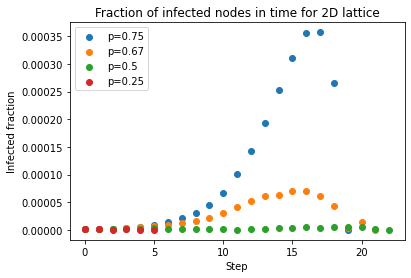

In [106]:
plt.scatter([i for i in range(L2D_infected_025.shape[1])], L2D_infected_025.mean(), label='p=0.75')
plt.scatter([i for i in range(L2D_infected_033.shape[1])], L2D_infected_033.mean(), label='p=0.67')
plt.scatter([i for i in range(L2D_infected_05.shape[1])], L2D_infected_05.mean(), label='p=0.5')
plt.scatter([i for i in range(L2D_infected_075.shape[1])], L2D_infected_075.mean(), label='p=0.25')
plt.title(r'Fraction of infected nodes in time for 2D lattice')
plt.xlabel('Step')
plt.legend()
plt.ylabel('Infected fraction')

In [95]:
RG_infected_025 = SIR_on_graph_MC(RG, 0.25, 100)
RG_infected_05 = SIR_on_graph_MC(RG, 0.5, 100)
RG_infected_075 = SIR_on_graph_MC(RG, 0.75, 100)

Text(0, 0.5, 'Infected fraction')

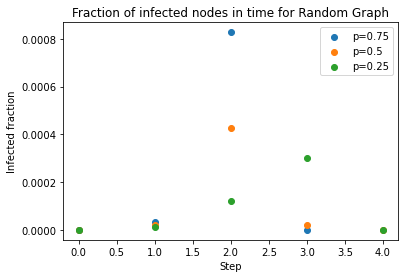

In [105]:
plt.scatter([i for i in range(RG_infected_025.shape[1])], RG_infected_025.mean(), label='p=0.75')
plt.scatter([i for i in range(RG_infected_05.shape[1])], RG_infected_05.mean(), label='p=0.5')
plt.scatter([i for i in range(RG_infected_075.shape[1])], RG_infected_075.mean(), label='p=0.25')
plt.title(r'Fraction of infected nodes in time for Random Graph')
plt.xlabel('Step')
plt.legend()
plt.ylabel('Infected fraction')

In [97]:
WSM_infected_025 = SIR_on_graph_MC(WSM, 0.25, 100)
WSM_infected_05 = SIR_on_graph_MC(WSM, 0.5, 100)
WSM_infected_075 = SIR_on_graph_MC(WSM, 0.75, 100)

Text(0, 0.5, 'Infected fraction')

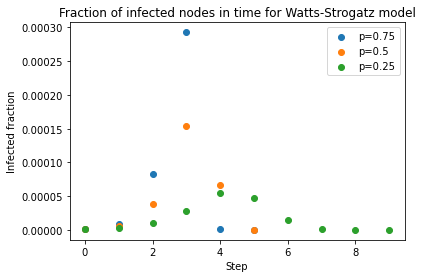

In [104]:
plt.scatter([i for i in range(WSM_infected_025.shape[1])], WSM_infected_025.mean(), label='p=0.75')
plt.scatter([i for i in range(WSM_infected_05.shape[1])], WSM_infected_05.mean(), label='p=0.5')
plt.scatter([i for i in range(WSM_infected_075.shape[1])], WSM_infected_075.mean(), label='p=0.25')
plt.title(r'Fraction of infected nodes in time for Watts-Strogatz model')
plt.xlabel('Step')
plt.legend()
plt.ylabel('Infected fraction')

In [102]:
BAM_infected_025 = SIR_on_graph_MC(BAM, 0.25, 100)
BAM_infected_05 = SIR_on_graph_MC(BAM, 0.5, 100)
BAM_infected_075 = SIR_on_graph_MC(BAM, 0.75, 100)

Text(0, 0.5, 'Infected fraction')

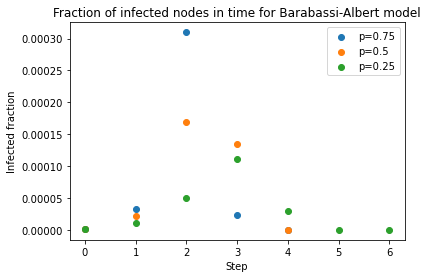

In [103]:
plt.scatter([i for i in range(BAM_infected_025.shape[1])], BAM_infected_025.mean(), label='p=0.75')
plt.scatter([i for i in range(BAM_infected_05.shape[1])], BAM_infected_05.mean(), label='p=0.5')
plt.scatter([i for i in range(BAM_infected_075.shape[1])], BAM_infected_075.mean(), label='p=0.25')
plt.title(r'Fraction of infected nodes in time for Barabassi-Albert model')
plt.xlabel('Step')
plt.legend()
plt.ylabel('Infected fraction')

### Analysis of SIR model on different graphs

In [110]:
def SIR_measures_on_graph(G, p):
    """
        Function that generates SIR model simulations on a graph with arguments:
        
        G (networkx.Graph()) - graph to simulate the model on
        p (float) - probability of infection 
        
        Returns 
        * total propotion of the network that becomes infected, 
        * the time to clear infection
        * the time to the largest number of infected nodes
    """
    d = {node : 'S' for node in G.nodes()}
    nx.set_node_attributes(G, d, 'state')

    starting_node = random.choice(list(G.nodes()))
    d[starting_node] = 'I'
    nx.set_node_attributes(G, d, 'state')
    
    infected_list = [starting_node]
    t = 0
    time_of_max_inf = 1
    infected_num = len(infected_list)
    while list(set(list(nx.get_node_attributes(G, 'state').values()))) != ['R'] and len(infected_list)!=0:
        new_infected_list = []
        for node in infected_list:
            d[node] = 'R'
            for new_infected in G.neighbors(node):
                if G.nodes[new_infected]['state'] == 'S' and random.uniform(0, 1) > p:
                    d[new_infected] = 'I'
                    new_infected_list.append(new_infected)
        nx.set_node_attributes(G, d, 'state')
        infected_list = new_infected_list
        
        if infected_num < len(infected_list):
            time_of_max_inf = t
        t += 1
    total_proportion = list(nx.get_node_attributes(G, 'state').values()).count('R')/nx.number_of_nodes(G)

    return total_proportion, t, time_of_max_inf

In [111]:
def SIR_measures(G, ps):
    df = pd.DataFrame(columns=['infected proportion', 'time to clear', 'time to large num'])
    for p in ps:
        result = SIR_measures_on_graph(G, p)
        df.loc[len(df)] = result
    return df

In [ ]:
L2D = nx.grid_2d_graph(10, 10)
RG = nx.erdos_renyi_graph(100, 0.5)
WSM = nx.watts_strogatz_graph(100, 15, 0.6)
BAM = nx.barabasi_albert_graph(100, 10)

In [112]:
res2D = SIR_measures(L2D, np.linspace(0.01, 0.99, 20))
resRG = SIR_measures(RG, np.linspace(0.01, 0.99, 20))
resWSM = SIR_measures(WSM, np.linspace(0.01, 0.99, 20))
resBAM = SIR_measures(BAM, np.linspace(0.01, 0.99, 20))

In [113]:
def plot_SIR_measures(res2D, resRG, resWSM, resBAM, ps):
    #inf proportion
    plt.plot(ps, res2D['infected proportion'], label='2D lattice')
    plt.plot(ps, resRG['infected proportion'], label='Random Graph')
    plt.plot(ps, resWSM['infected proportion'], label='Watts-Strogatz model')
    plt.plot(ps, resBAM['infected proportion'], label='Barabassi-Albert model')
    plt.title('Total proportion of infected fraction')
    plt.xlabel('p')
    plt.ylabel('infected fraction')
    plt.show()
    
    plt.plot(ps, res2D['time to clear'], label='2D lattice')
    plt.plot(ps, resRG['time to clear'], label='Random Graph')
    plt.plot(ps, resWSM['time to clear'], label='Watts-Strogatz model')
    plt.plot(ps, resBAM['time to clear'], label='Barabassi-Albert model')
    plt.title('Time to clear infection')
    plt.xlabel('p')
    plt.ylabel('time to clear')
    plt.show()
    
    plt.plot(ps, res2D['time to large num'], label='2D lattice')
    plt.plot(ps, resRG['time to large num'], label='Random Graph')
    plt.plot(ps, resWSM['time to large num'], label='Watts-Strogatz model')
    plt.plot(ps, resBAM['time to large num'], label='Barabassi-Albert model')
    plt.title('Time to the largest number of infections')
    plt.xlabel('p')
    plt.ylabel('time to largest num')
    plt.show()

,infected proportion,time to clear,time to large num
0,1.00,3.0,1.0
1,1.00,3.0,1.0
2,1.00,3.0,1.0
3,1.00,3.0,1.0
4,1.00,3.0,1.0
5,1.00,3.0,1.0
6,1.00,3.0,1.0
7,1.00,3.0,1.0
8,1.00,3.0,1.0
9,1.00,3.0,1.0


## Visualization of SIR model on different graphs

In [7]:
def SIR_for_gif(G, p, starting_node=0):
    """
    Function that generates SIR model simulations on a graph while resulting full state matrix for animation purpose
        
    * G (networkx.Graph()) - graph to simulate the model on
    * p (float) - probability of infection 
    """
    d = {node : 'S' for node in G.nodes()}
    nx.set_node_attributes(G, d, 'state')

    #infected_node = random.choice(list(G.nodes()))
    d[starting_node] = 'I'
    nx.set_node_attributes(G, d, 'state')
    
    infected_list = [starting_node]
    infected_fraction = [len(infected_list)/N]
    
    matrix = nx.get_node_attributes(G, 'state')

    while list(set(list(nx.get_node_attributes(G, 'state').values()))) != ['R'] and len(infected_list)!=0:
        new_infected_list = []
        for node in infected_list:
            d[node] = 'R'
            for new_infected in G.neighbors(node):
                if G.nodes[new_infected]['state'] == 'S' and random.uniform(0, 1) > p:
                    d[new_infected] = 'I'
                    new_infected_list.append(new_infected)
        nx.set_node_attributes(G, d, 'state')
        infected_list = new_infected_list
        infected_fraction.append(len(infected_list)/N)
    
        label = nx.get_node_attributes(G, 'state')
        matrix = np.vstack([matrix, label])

    return matrix

In [22]:
def create_SIR_anim(G, p, gif_name="anim", starting_node=0):
    """
    Function that generates an animation of SIR on a given graph
    * G (networkx.graph()) - given graph we perform SIR model
    * p (float, 0<p<1) - probability of infection
    * gif_name (str) - name for the resulting gif file
    """
    colors = {'S': 'green', 'I': 'red', 'R': 'blue'}
    results = SIR_for_gif(G, p, starting_node)
    fig, ax = plt.subplots()
    #pos = nx.layout.spring_layout(G)
    
    nx.draw_network(G)#, pos=pos)
    
    def animate(i, matrix):
        ax.cla()
        labels = matrix[i][0]
        node_color = [colors[state] for state in labels.values()]
        nx.draw(G,  labels=labels, node_color=node_color)
    
    anim = animation.FuncAnimation(fig, animate, frames=len(results), fargs=(results,))

    anim.save(f'images/{gif_name}.gif')

In [30]:
L2D = nx.grid_2d_graph(30, 30)

In [38]:
RG = nx.erdos_renyi_graph(30, 0.5)

In [17]:
WSM = nx.watts_strogatz_graph(30, 10, 0.5)

In [30]:
BAM = nx.barabasi_albert_graph(30, 5)

In [15]:
create_SIR_anim(WSM, 0.5, 'anim_BAM5_sn10_p05', 10)

NameError: name 'WSM' is not defined

AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

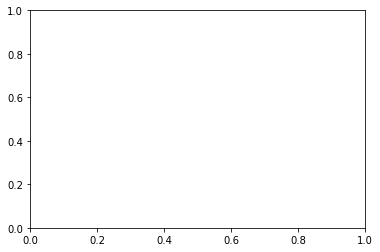

In [20]:
create_SIR_anim(L2D, 0.5, 'anim_L2D_p05', (0, 0))

## SIR model on a network (continued)

In [75]:
def SIR_on_network_MC(G, p, steps, starting_node=0):
    """
        Function that generates SIR model simulations on a graph for given number of MC steps:
        
        G (networkx.Graph()) - graph to simulate the model on
        p (float) - probability of infection 
        steps (int) - number of Monte Carlo steps
    """
    d = {node : 'S' for node in G.nodes()}
    nx.set_node_attributes(G, d, 'state')


    d[starting_node] = 'I'
    nx.set_node_attributes(G, d, 'state')
    
    infected_list = [starting_node]

    chosen_node = None
    
    res_list = list(np.zeros(steps))
    for mc in range(steps):
        for node in range(len(list(G.nodes()))):
            if chosen_node != None:
                d[chosen_node] = 'R'
            chosen_node = random.choice(list(G.nodes()))

            for new_infected in G.neighbors(chosen_node):
                if G.nodes[new_infected]['state'] == 'S' and random.uniform(0, 1) > p:
                    d[new_infected] = 'I'
        res_list[mc] = d

    return res_list

In [76]:
RG = nx.erdos_renyi_graph(30, 0.5)

In [77]:
res = SIR_on_network_MC(RG, 0.5, 5)

In [78]:
print(res)

[{0: 'R', 1: 'I', 2: 'I', 3: 'R', 4: 'I', 5: 'R', 6: 'I', 7: 'I', 8: 'I', 9: 'I', 10: 'I', 11: 'R', 12: 'I', 13: 'I', 14: 'I', 15: 'I', 16: 'I', 17: 'I', 18: 'I', 19: 'R', 20: 'I', 21: 'I', 22: 'I', 23: 'I', 24: 'I', 25: 'I', 26: 'I', 27: 'I', 28: 'R', 29: 'I'}, {0: 'R', 1: 'I', 2: 'I', 3: 'R', 4: 'I', 5: 'R', 6: 'I', 7: 'I', 8: 'I', 9: 'I', 10: 'I', 11: 'R', 12: 'I', 13: 'I', 14: 'I', 15: 'I', 16: 'I', 17: 'I', 18: 'I', 19: 'R', 20: 'I', 21: 'I', 22: 'I', 23: 'I', 24: 'I', 25: 'I', 26: 'I', 27: 'I', 28: 'R', 29: 'I'}, {0: 'R', 1: 'I', 2: 'I', 3: 'R', 4: 'I', 5: 'R', 6: 'I', 7: 'I', 8: 'I', 9: 'I', 10: 'I', 11: 'R', 12: 'I', 13: 'I', 14: 'I', 15: 'I', 16: 'I', 17: 'I', 18: 'I', 19: 'R', 20: 'I', 21: 'I', 22: 'I', 23: 'I', 24: 'I', 25: 'I', 26: 'I', 27: 'I', 28: 'R', 29: 'I'}, {0: 'R', 1: 'I', 2: 'I', 3: 'R', 4: 'I', 5: 'R', 6: 'I', 7: 'I', 8: 'I', 9: 'I', 10: 'I', 11: 'R', 12: 'I', 13: 'I', 14: 'I', 15: 'I', 16: 'I', 17: 'I', 18: 'I', 19: 'R', 20: 'I', 21: 'I', 22: 'I', 23: 'I', 24: 'I

#### Animations are inserted at the end of file

### TODO

<ul>
    <li> add 2D lattice graph
    <li> check docstrings (parameters and outputs)